In [1]:
#!pip install pysolve3

Time checking:

In [2]:
from datetime import datetime
t1 = datetime.now()

# Introduction

Jupyter notebook for the simplest model scratch. By convention, all exogenous variables are presented with a overline line (*e.g.* $\overline a$) and the parameters are represented by greek letters (*e.g.* $\alpha$). The code in this document is executable and is strongly recommend to do the follow to ensure that the output is corrected and updated:

Run time > Restart and run all...

# Changes

In this version, the autonomous growth rate is endogenized as a function of housing own interest rates:

$$
g_Z = \phi_0  -\phi_1\cdot \left(\frac{1+r_{mo}}{1+\dot p_h}-1\right)
$$
which

- $\phi_0$ and $\phi_1$ are parameters
- $\dot p_h$ is housing inflation and equals 0 in this version

$$
\dot p_h = \frac{\Delta p_h}{p_{h_{-1}}}
$$

$$
p_h = \xi \cdot p_{h_{-1}} \Rightarrow \dot p_h = \xi -1
$$

## Variables list

- $C$ Consumption
- $CG$: Capital gains
- $FT$: Total profits
- $FD$: Distributed profits
- $FU$: Retained profits
- $g_i$: Growth rate of variable $i$
- $g^e_i$: Expected growth rate of variable $i$
- $h$: Marginal propensity to invest
- $I$: Total investment
- $I_f$: Non-residential investment
- $I_h$: Residential investment
- $K_f$: Non-residential fixed capital
- $K_h$: Residential capital
- $K_{HD}$: Demand for houses
- $K_{HU}$: Unsold houses
- $K_H$: Houses supply
- $L$: Loans
- $morp$: Mortgages repayments
- $M$: Money deposits
- $MO$: Mortgages
- $p_h$ Housing prices
- $r_l$: Interest rates on Loans
- $r_m$: Interest rates on money deposits
- $r_H$: Housing own interest rates
- $S_i$: Sector $i$ savings
- $u$: Capacity utilization ratio
- $v$: Capacity-Output ratio
- $V_i$: Net financial Wealth of sector $i$
- $W$ Total Wage bill
- $Y$: GDP
- $Y_K$: Capacity
- $YD$: Household disposable income
- $Z$: Autonomous expenditures

## Parameters list

- $\alpha$: Propensity to consume out of wages
- $\beta$: Expectation adjustment parameter
- $\gamma_F$: % of distributed profits
- $\gamma_u$: Adjustment parameter for the marginal propensity to invest

## Exogenous variables

- $gz$: Autonomous grouth rate
- $\omega$: Wage share
- $rm$: Interest rates on money deposits
- $spread_l$: Spread for loans
- $spread_{mo}$: Spread for mortgages
- $un$: Normal capacity utilization ratio
- $v$: Capitl-Output ratio

# Assumptions

## General

- No inflation
- Two kinds of capital: Residential and non-Residential
- No depeciation
- Non-residential investment is induced

## Households

- All savings are accumulated in bank deposits
- Households do not have access to Loans


## Firms


## Banks

- Have any net worth

# Matrix

## Balance sheet

|                	| Households 	|  Firms 	| Banks 	| $\sum$ 	|
|----------------	|:----------:	|:------:	|:-----:	|:------:	|
| Money Deposits 	|    $+M$    	|        	|  $-M$ 	|   $0$  	|
|Firms'  Loans          	|            	|  $-L_f$  	|  $+L_f$ 	|   $0$  	|
| Households' Loans          	|   $-L_h$	|   	|  $+L_h$ 	|   $0$  	|
| Mortgages          	| $-MO$           	|   	|  $+MO$ 	|   $0$  	|
| Capital        	|    |  $K_f$ 	|       	|   $K_f$  	|
| Houses 	|    $K_{HD}$    	| |  	|   $K_H$  	|
| Net Worth      	|   $V_h$   	| $V_f$ 	| $V_b$      	|  $K$  	|


## Transactions and flow  of funds matrix

|                            	|Households             	| Households  	| Firms                  	| Firms       	| Banks                  	|  Sum    	|
|----------------------------	|------------------------	|-------------	|------------------------	|-------------	|------------------------	|-------------	|
|                            	| Current                	| Capital     	| Current                	| Capital     	| Current                	| $\sum$ 	|
| Consumption                	| $-C$                   	|             	| $+C$                   	|             	|                        	|             	$0$    	|
| Investment                 	|                  	|             	| $+I_f$                    	| $-I_f$      	|                        	|             	$0$    	|
| Residential Investment                 	|                  	| $-I_h$            	| $+I_h$                    	|       	|                        	|             	 $0$    	|
| **[Production]**               	|                        	|             	| **[$Y$]**                  	|             	|                        	|             	$[Y]$    	|
| Wages                      	| $+W$                    	|             	| $-W$                   	|             	|                        	|             	$0$    	|
| Profits                      	| $+FD$                    	|             	| $-FT$                   	| $+FU$	|                        	|             	$0$    	|
| Interests on loans         	|  $-r_{l-1}\cdot L_{h_{-1}}$ 	|             	| $-r_{l-1}\cdot L_{f_{-1}}$ 	|             	| $+r_{l-1}\cdot L_{-1}$ 	|             	$0$    	|
| Interests on Bank deposits 	| $+r_{m-1}\cdot M_{-1}$ 	|             	|                        	|             	| $-r_{m-1}\cdot M_{-1}$ 	|             	$0$    	|
| Interests on Mortgage 	| $-r_{mo-1}\cdot MO_{-1}$ 	|             	|                        	|             	| $+r_{mo-1}\cdot MO_{-1}$  	|             	$0$    	|
| **Subtotal** 	| $+S_h$ 	| $-I_h$|                        	|  $+NFW_f$           	|  +$NFW_b$	|             	 $0$    	|
| Change in household Loans            	|   $+\Delta L_f$ 	|             	|                        	|  	|                        	 $-\Delta L_h$ 	|$0$    	|
| Change in firms Loans            	|                        	|             	|                        	| $+\Delta L_f$ 	|                        	 $-\Delta L_f$ 	|$0$    	|
| Change in Bank deposits    	| $-\Delta M$                       	|  	|                        	|             	|                        	$+\Delta M$ 	| $0$    	|
| Change in Mortgages    	|                        	| $+\Delta MO$ 	|                        	|             	|                        	$-\Delta MO$ 	| $0$    	|
| Sum    	| $0$                        	| $0$ 	| $0$| $0$| $0$| $0$| 

# Equations

## General Equations

$$
Y = C + I
$$

$$
I = I_f + I_h
$$

$$
\omega = \overline \omega
$$

$$
W = \omega \cdot  Y
$$

$$
Y_K = \frac{K_f}{\overline v}
$$

$$
u = \frac{Y}{Y_K}
$$

$$
g_k = \frac{h\cdot u}{v}
$$

$$
Z = I_h + N
$$

$$
K = K_f + K_{HD}
$$

## Households

$$
YD = W + FD + \overline r_{m-1}\cdot M_{-1} - \overline r_{mo-1}\cdot MO - r_l\cdot{L_h}
$$


$$
S_h = YD - C = \Delta M
$$

$$
C = \alpha\cdot W + N
$$

$$
\Delta L_h = N
$$

$$
N = (\Theta)\cdot I_{h_{-2}}
$$

$$
\Delta MO = I_h
$$

$$
V_h = M + K_H - MO - L_h
$$

$$
NFW_h = S_h - I_h
$$

\begin{equation}
\tag{\equiv S_h}
\text{Residual} = \Delta M - \Delta L_f \hspace{3cm}
\end{equation}

## Firms

$$
\Delta L_f = I_f - FU
$$

$$
FT = Y - W = FU+ FD
$$

$$
FU = \gamma_F\cdot (FT - r_{L_{-1}}\cdot L_{f_{-1}})
$$


$$
FD = (1 - \gamma_F)\cdot (FT - r_{L_{-1}}\cdot L_{f_{-1}})
$$

$$
I_f = h\cdot Y
$$

$$
\Delta K_f = I_f
$$

$$
\Delta h = 
h_{-1}\cdot \gamma_u\cdot (u - \overline u_n)
$$

$$
V_f = K_f  - L_f
$$

$$
NFW_f = FU - I_f
$$

## Banks

$$
L = L_f + L_h
$$

$$
\Delta M = \Delta L + \Delta MO
$$

$$
NFW_b = rl_{-1}\cdot L_{-1} + rmo_{-1}\cdot MO_{-1} - rm_{-1}\cdot M_{-1}
$$

$$
r_l = r_m + spread_l (=0)
$$

$$
r_{mo} = r_m + spread_{mo} (=0)
$$

$$
V_b = L + MO - M
$$

## Residential Investment


$$
K_{HS} = K_{HD}
$$

$$
I_h^S = I_h
$$

$$
\Delta K_{HD} = I_h
$$

$$
I_h = (1+g_Z)\cdot I_{h_{-1}}
$$


$$
k = \frac{K_h}{K}
$$

# Simulation setup

## Loading libraries

In [3]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
import networkx as nx
import sympy as sp
from sympy import pprint, cse


import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual


plt.style.use('seaborn-white')

from pysolve3.utils import ShockModel, SFCTable, SolveSFC, SummaryShock
from pysolve3.model import Model



# Creating model function

In [4]:
def model(
    alpha = 1,
    gamma_F = 0.4,
    gamma_u = 0.01,
    g_Z = 0.05,
    omegapar = 0.5,
    rm = 0.02,
    spread_l = 0,
    spread_mo = 0,
    un = 0.8,
    v = 2.5,
    Theta = 0.15,
    phi_0 = 0.04,
    phi_1 = 0.02,
    infla = 0.0,
    phparam=1.0
):
  """
  phparam: 1.0 means no inflation
  """
  model = Model()
  model.set_var_default(0) 
  model.var('C', desc='Consumption')
  model.var('FD', desc='Distributed profits')
  model.var('Fn', desc='Net profits')
  model.var('FT', desc='Total Profits')
  model.var('FU', desc='Retained profits')
  model.var('gk', desc='Capital growth rate', default=0.01)
  model.var('g_Z', desc='Autonomous grouth rate', default=g_Z)
  model.var('h', desc='Marginal propensity to invest (non-residential)', default=0.30)
  model.var('I_t', desc='Investment', default = 100) # 200
  model.var('I_f', desc='Non-residential investment') # 100
  model.var('I_h', desc='Residential investment', default = 100) # 100
  model.var('Is', desc='Residential investment (Supply)', default = 100) # 100
  model.var('infla', desc='Housing inflation', default = phparam)
  model.var('K_HS', desc='Houses supply', default=500) # 500
  model.var('K_HD', desc='Houses demand', default=500) # 500
  model.var('K_f', desc='Non-residential capital', default = 1000) # 10000
  model.var('K', desc='Capital', default=1500)
  model.var('Kreal', desc='Capital', default=1500)
  model.var('k', desc="% of Kf in total")
  model.var('L', desc='Total Loans') # 100
  model.var('Lf', desc='Firms Loans') # 100
  model.var('Lh', desc='Household Loans') # 100
  model.var('M', desc='Money deposits', default = 305) # 300
  model.var('MO', desc='Mortgages', default = 305) # 200
  model.var('N', desc='New Loans', default = 100) # 200
  model.var('NFW_h', desc='Households Net Financial Wealth')
  model.var('NFW_f', desc='Firms Net Financial Wealth')
  model.var('NFW_b', desc='Banks Net Financial Wealth')
  model.var('omega', desc='Wage-share', default = 0.5)
  model.var('own', desc='Own interest rate')
  model.var('ph', desc='House price', default = 1)
  model.var('rl', desc='Interests rates on loans')
  model.var('rmo', desc='Interests rates on mortgages')
  model.var('S_h', desc='Households savings', default = 100)
  model.var('u', desc='Capacity utilization ratio', default=0.7)
  model.var('V_h', desc='Household net financial wealth', default = 500)
  model.var('V_f', desc='Firms net financial wealth', default = 1000)
  model.var('V_b', desc='Banks net financial wealth')
  model.var('W', desc='Wages')
  model.var('Y', desc='GDP')
  model.var('Yk', desc='Capacity')
  model.var('YD', desc='Household disposable income')
  model.var('Z', desc='Autonomous expenditures')
  model.var('Residual', desc='Unecessarily equation. Should be zero')
  
  model.param('alpha', desc='Propensity to consume out of wages', default=alpha) # 0.7
  model.param('gamma_F', desc='% of undistributed profits', default=gamma_F) # 0.4
  model.param('gamma_u', desc='Adjustment parameter for the marginal propensity to invest', default=gamma_u) # 0.01
  model.param('omegapar', desc='Wage-share', default=omegapar) # 0.5
  model.param('rm', desc='Interest rates on money deposits', default=rm) # 0.02
  model.param('spread_l', desc='Spread for loans', default=spread_l) # 0.01
  model.param('spread_mo', desc='Spread for mortgages', default=spread_mo) # 0.005
  model.param('Theta', desc = 'Lag paramets', default = Theta)
  model.param('un', desc='Normal capacity utilization ratio', default=un) # 0.8
  model.param('v', desc='Capitl-Output ratio', default=v) # 2.5
  model.param('phi_0', desc='Autonomous housing investment component',default = phi_0)
  model.param('phi_1', desc='Housing investment sensitivity to own interest rate', default = phi_1)
  model.param('phparam', desc='ph parameter', default = phparam)
  model.param('inflaparam', desc='infla value', default = infla)
  
  
  # General equations
  model.add('Y = C + I_t') # Eq1
  model.add('I_t = I_f + I_h') # Eq2
  model.add('omega = omegapar') # Eq 3
  model.add('Yk = K_f(-1)/v') # Eq 4
  model.add('u = Y/Yk') # Eq 5
  model.add('W = omega*Y') # Eq 6
  model.add('gk = h*u/v') # Eq 7
  model.add('K = K_HD*ph + K_f') # Eq 8 ################################### Changes #################################################
  model.add('Kreal = K_HD + K_f') # Eq 8 ################################### Changes #################################################
  model.add('Z = I_h + N') # Eq 9
  
  # Household equations
  model.add('YD = W + FD + rm*M(-1) - rmo*MO(-1) - rl*Lh(-1)') # Eq 10
  model.add('S_h = YD - C') # Eq 11
  model.add('d(MO) = I_h') # Eq 12
  model.add('N = Theta*I_h(-2)*(ph(-2) - ph(-3))') # Eq 12
  #model.add('N = Theta*K_HD(-1)*d(ph)') # Eq 12 ################################### Changes #################################################
  model.add('d(Lh) = N') # Eq 13
  model.add('C = alpha*W + N') # Eq 14
  model.add('V_h =  M - Lh + K_HD*ph - MO') # Eq 15 ################################### Changes #################################################
  model.add('NFW_h = S_h - I_h') # Eq 16
  
  # Firms
  model.add('d(Lf) = I_f - FU') # Eq 15
  model.add('FT = (1-omega)*Y') # Eq 16
  model.add('Fn = FT -rl*Lf(-1)')
  model.add('FU = gamma_F*(Fn)') # Eq 17
  model.add('FD = (1 - gamma_F)*(Fn)') # Eq 18
  model.add('I_f = h*Y') # Eq 19
  model.add('d(K_f) = I_f') # 20
  model.add('h = h(-1)*gamma_u*(u-un) + h(-1)') # Eq 21 # Version without corridor
  model.add('V_f = K_f - Lf') # Eq 22
  model.add('NFW_f = FU - I_f') # Eq 23
  
  # Banks
  model.add('L = Lf + Lh')
  model.add('d(M) = d(L) + d(MO)') # Eq 24
  model.add('rmo = rm + spread_mo') # Eq 25
  model.add('rl = rm + spread_l') # Eq 26
  model.add('V_b = L + MO - M') # Eq 27
  model.add('NFW_b = rl*L(-1) + rmo*MO(-1) - rm*M(-1)') # Eq 28
  
  # Residential investment
  model.add('K_HS = K_HD') # Eq 29
  model.add('Is = I_h')
  #model.add('d(K_HD) = I_h*ph(-1) + K_HD(-1)*d(ph)') # Eq 30 ################################### Changes #################################################
  model.add('d(K_HD) = I_h') # Eq 30
  model.add('I_h = (1+g_Z)*I_h(-1)') # Eq 31
  model.add('k = K_HD*ph/K') ################################### Changes #################################################
  #model.add('infla = d(ph)/ph(-1)') ################################### Changes #################################################
  model.add('infla = inflaparam') ################################### Changes #################################################
  #model.add('infla = -0.4*infla(-1) - 0.1*infla(-2)')
  model.add('ph =(1+infla)*ph(-1)') ################################### Changes #################################################
  model.add('own = ((1+rmo)/(1+infla)) -1') ################################### Changes #################################################
  model.add('g_Z = phi_0 - phi_1*own') ################################### Changes #################################################
  
  
  model.add('Residual = d(M) - d(Lh) - S_h')
  
  # Aditionals
#  model.add('Debt_H = rmo*MO(-1)/YD')
#  model.add('Debt_F = rl*L(-1)/FU')
#  model.add('Depo = rm*M(-1)/YD')
  return model

t_check = 100
print('Evaluating consistenty at time = {}'.format(t_check))

test = model()
SolveSFC(test, time=t_check, table = False)
evaldf = pd.DataFrame({
    'Households' : test.evaluate('M - MO - Lh + K_HD*ph - V_h'), ################################### Changes #################################################
    'Firms' : test.evaluate('K_f - Lf - V_f'),
    'Banks' : test.evaluate('L + MO - M - V_b'),
    'Mortgages' : test.evaluate('MO(-1) - MO(-2) - I_h(-1)'),
    'Financial assets' : test.evaluate('d(MO) + d(L) - d(M)'),
    '[Total Wealth - K]' : test.evaluate('V_f + V_h + V_b - K'),
    "Firm's Funds" : test.evaluate('Lf(-1) - Lf(-2) - I_f(-1) + FU(-1)'),
    "Housing" : test.evaluate('K_HD - K_HS'),
    "[Net Financial Wealth]" : test.evaluate('NFW_h + NFW_f + NFW_b'),
    "Investment" : test.evaluate('I_t - I_h - I_f'),
    "Profits" : test.evaluate('FT(-1) - rl*Lf(-2) - FU(-1) - FD(-1)'),
    "Wages" : test.evaluate('W - omega*Y'),
    "Residual" : test.evaluate('Residual')
}, index = ['Sum'])
evaldf = evaldf.transpose()
evaldf.round(5)

Evaluating consistenty at time = 100


,Sum
Households,0.00001
Firms,0.00000
Banks,0.00000
Mortgages,0.00000
Financial assets,0.00000
[Total Wealth - K],0.00007
Firm's Funds,-0.00000
Housing,0.00000
[Net Financial Wealth],-0.00027
Investment,-0.00007


# Solving

In [5]:
base = model()
df = SolveSFC(base, time=1000)
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
C,0.00,261.899613,273.862702,2.859360e+02,2.981603e+02,3.105705e+02,323.197322,3.360685e+02,3.492096e+02,362.645036,...,6.886025e+18,7.158712e+18,7.442196e+18,7.736907e+18,8.043289e+18,8.361803e+18,8.692930e+18,9.037170e+18,9.395041e+18,9.767085e+18
FD,0.00,157.139768,163.679456,1.702434e+02,1.768570e+02,1.835417e+02,190.316464,1.971982e+02,2.042025e+02,211.344090,...,4.530389e+18,4.709792e+18,4.896300e+18,5.090194e+18,5.291765e+18,5.501319e+18,5.719171e+18,5.945650e+18,6.181098e+18,6.425870e+18
FT,0.00,261.899613,273.862702,2.859360e+02,2.981603e+02,3.105705e+02,323.197322,3.360685e+02,3.492096e+02,362.645036,...,6.886025e+18,7.158712e+18,7.442196e+18,7.736907e+18,8.043289e+18,8.361803e+18,8.692930e+18,9.037170e+18,9.395041e+18,9.767085e+18
FU,0.00,104.759845,109.119637,1.134956e+02,1.179047e+02,1.223612e+02,126.877643,1.314655e+02,1.361350e+02,140.896060,...,3.020259e+18,3.139862e+18,3.264200e+18,3.393462e+18,3.527843e+18,3.667546e+18,3.812781e+18,3.963767e+18,4.120732e+18,4.283913e+18
Fn,0.00,261.899613,272.799093,2.837391e+02,2.947617e+02,3.059029e+02,317.194107,3.286636e+02,3.403375e+02,352.240150,...,7.550648e+18,7.849654e+18,8.160500e+18,8.483656e+18,8.819609e+18,9.168865e+18,9.531952e+18,9.909417e+18,1.030183e+19,1.070978e+19
I_f,0.00,157.940389,165.786601,1.735801e+02,1.813551e+02,1.891398e+02,196.957914,2.048299e+02,2.127741e+02,220.806574,...,1.704300e+18,1.771790e+18,1.841953e+18,1.914894e+18,1.990723e+18,2.069556e+18,2.151510e+18,2.236710e+18,2.325283e+18,2.417364e+18
I_h,100.00,103.960000,108.076816,1.123567e+02,1.168060e+02,1.214315e+02,126.240186,1.312393e+02,1.364364e+02,141.839254,...,5.181725e+18,5.386922e+18,5.600244e+18,5.822013e+18,6.052565e+18,6.292247e+18,6.541420e+18,6.800460e+18,7.069758e+18,7.349721e+18
I_t,100.00,261.900185,273.863229,2.859365e+02,2.981609e+02,3.105711e+02,323.197895,3.360690e+02,3.492102e+02,362.645619,...,6.886025e+18,7.158712e+18,7.442196e+18,7.736907e+18,8.043289e+18,8.361803e+18,8.692930e+18,9.037170e+18,9.395041e+18,9.767085e+18
Is,100.00,103.960000,108.076816,1.123567e+02,1.168060e+02,1.214315e+02,126.240186,1.312393e+02,1.364364e+02,141.839254,...,5.181725e+18,5.386922e+18,5.600244e+18,5.822013e+18,6.052565e+18,6.292247e+18,6.541420e+18,6.800460e+18,7.069758e+18,7.349721e+18
K,1500.00,1761.900185,2035.763618,2.321700e+03,2.619861e+03,2.930433e+03,3253.630857,3.589700e+03,3.938911e+03,4301.556355,...,1.807757e+20,1.879344e+20,1.953766e+20,2.031135e+20,2.111568e+20,2.195186e+20,2.282116e+20,2.372487e+20,2.466438e+20,2.564109e+20


# Baseline Plots

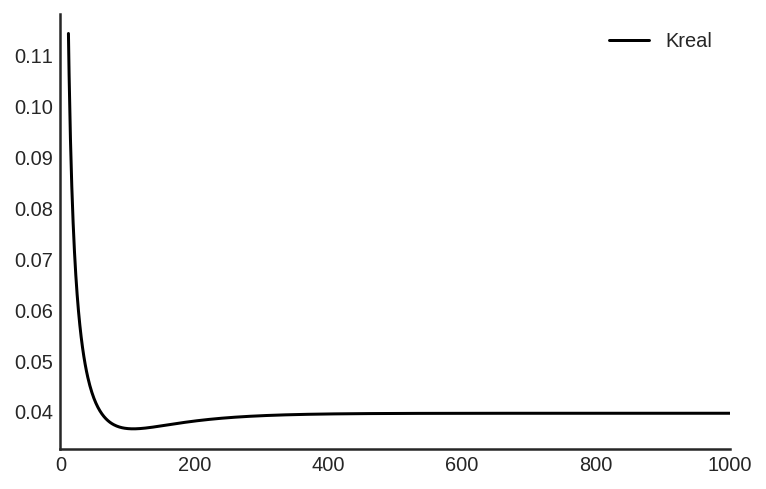

In [6]:
fig, ax = plt.subplots()

df[["Kreal"]].pct_change().rolling(12).mean().plot(ax=ax, color='black')
sns.despine()
plt.show()

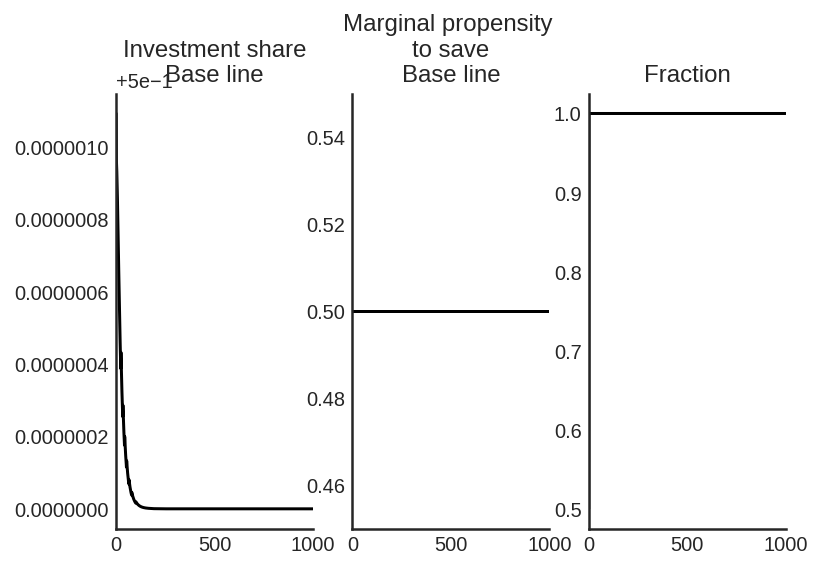

In [7]:
fig, ax = plt.subplots(1,3)

(df['I_t']/df['Y']).plot(title = 'Investment share\nBase line', color = 'black', ax = ax[0])
(1 - df['omega']).plot(title = 'Marginal propensity \nto save\nBase line', color = 'black', ax = ax[1])
ax[1].set_ylim(.45,.55)
(df['I_t']/(df['I_t'] + df['N'])).plot(title = 'Fraction', color = 'black', ax = ax[2])

sns.despine()
plt.show()

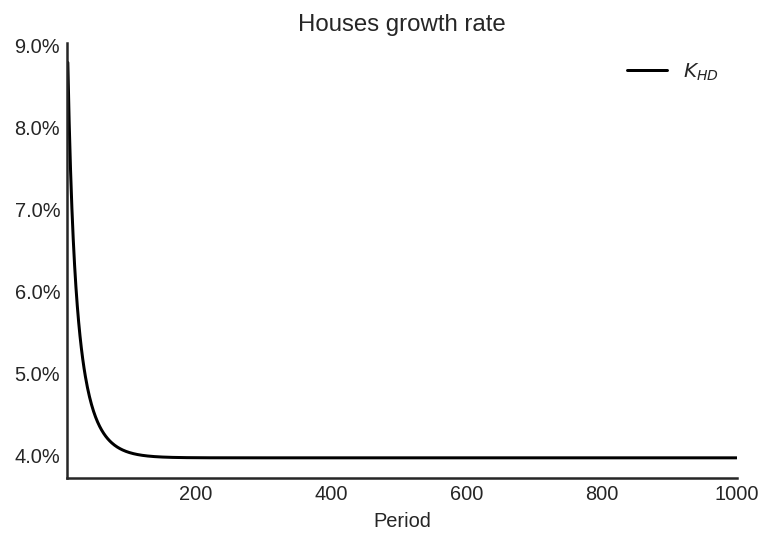

In [8]:
ax = df['K_HD'][10:].pct_change().plot(color = "black", title = "Houses growth rate", label = "$K_{HD}$", legend = True)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
plt.xlabel("Period")
sns.despine()
plt.show()

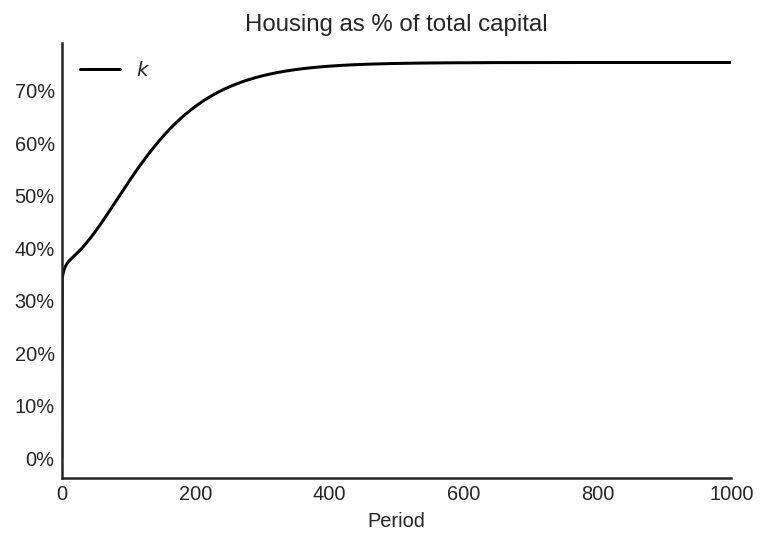

In [9]:
ax = df['k'].plot(color = "black", title = "Housing as % of total capital", label = "$k$", legend = True)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.xlabel("Period")
sns.despine()
plt.show()

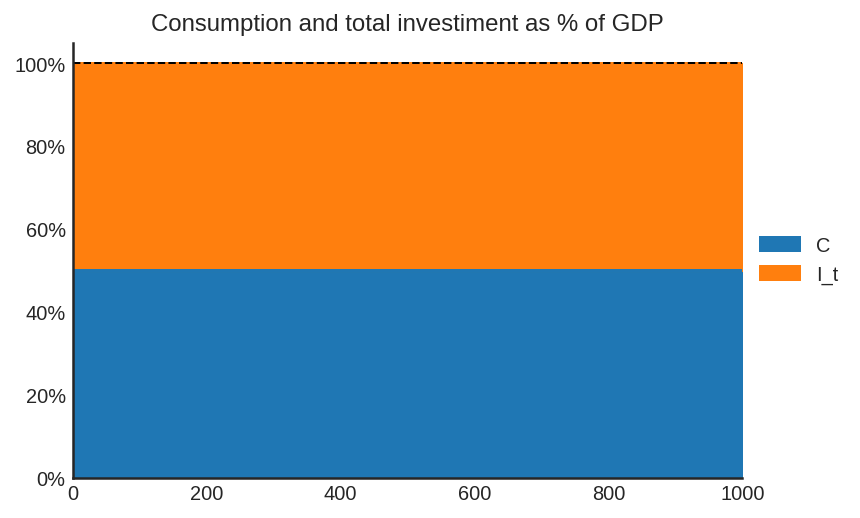

In [10]:
ax = df[['C', 'I_t']].apply(lambda x: x/df['Y']).plot(kind = 'area', stacked = True, legend = True, title = "Consumption and total investiment as % of GDP")
ax.axhline(y=1, color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

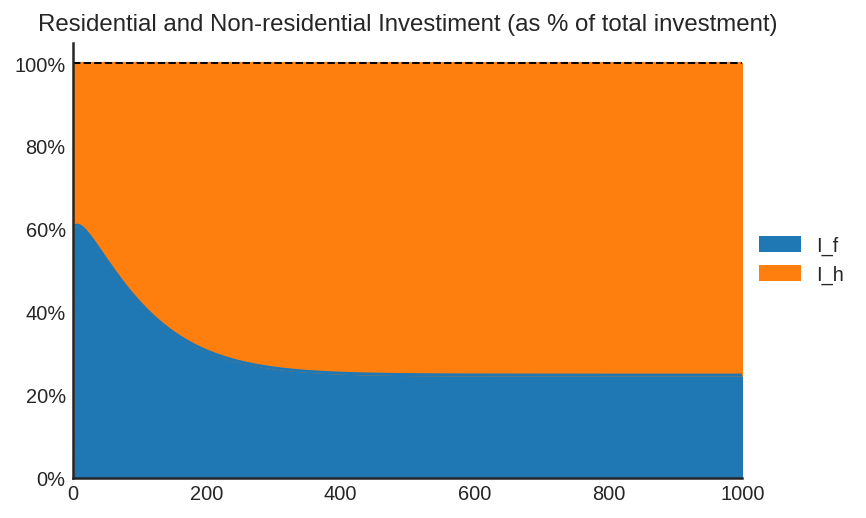

In [11]:
ax = df[['I_f', 'I_h']].apply(lambda x: x/df['I_t']).plot(kind = 'area', stacked = True, legend = True, title = "Residential and Non-residential Investiment (as % of total investment)")
ax.axhline(y=1, color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

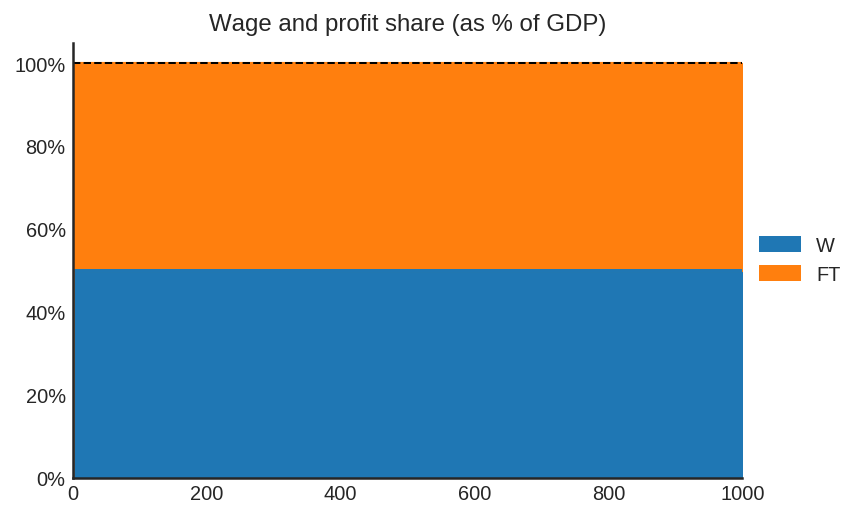

In [12]:
ax = df[['W', 'FT']].apply(lambda x: x/df['Y']).plot(kind = 'area', stacked = True, legend = True, title = "Wage and profit share (as % of GDP)")
ax.axhline(y=1, color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

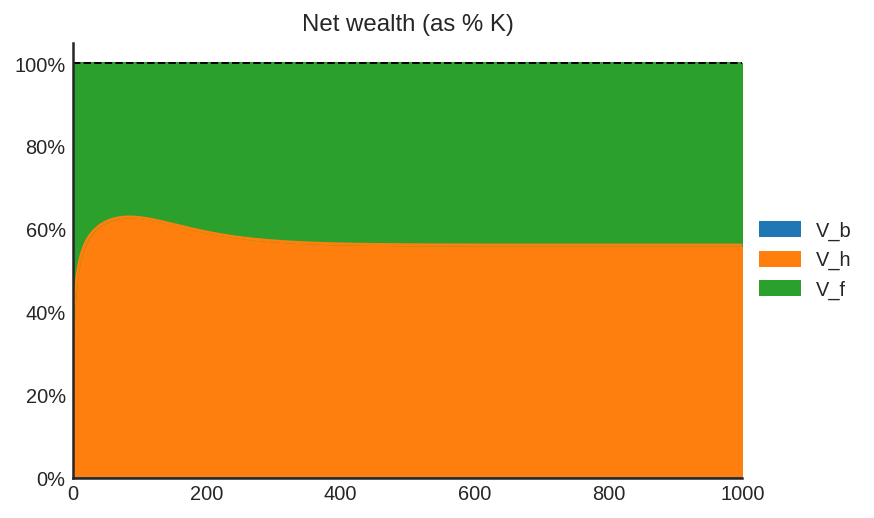

In [13]:
ax = df[['V_b', 'V_h', 'V_f']].apply(lambda x: np.abs(x)/df['K']).plot(kind = 'area', stacked = True, title = "Net wealth (as % K)")
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
ax.axhline(y=1, color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()
plt.show()

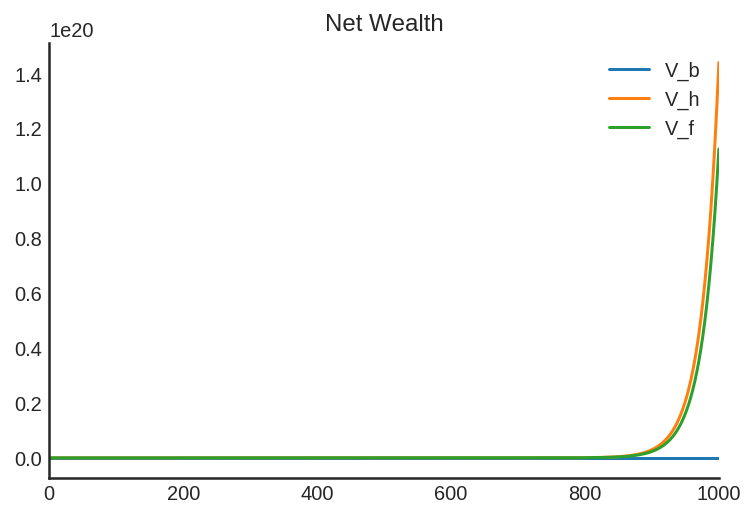

In [14]:
df[["V_b", "V_h", "V_f"]].plot(title = "Net Wealth")
sns.despine()
plt.show()

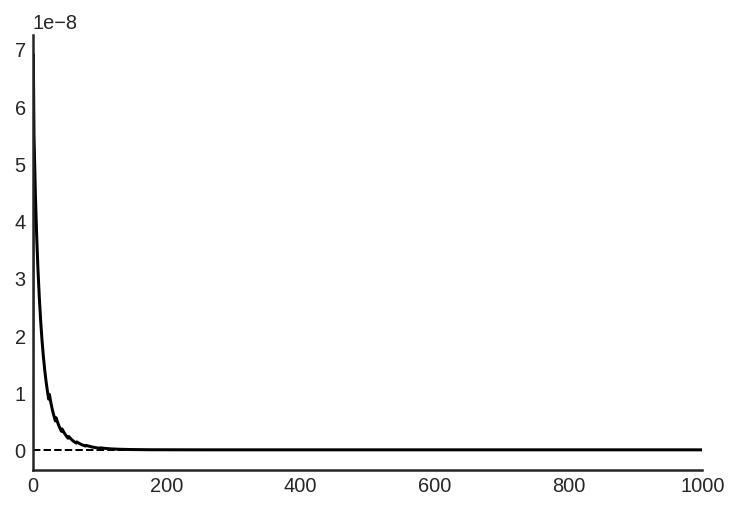

In [15]:
ax = ((df['V_b'] + df['V_f'] + df['V_h'] - df['K'])/df['K']).plot(label='Consistensy check', color='black')
ax.axhline(y=0, color = "black", ls = "--", lw=1)
sns.despine()
plt.show()

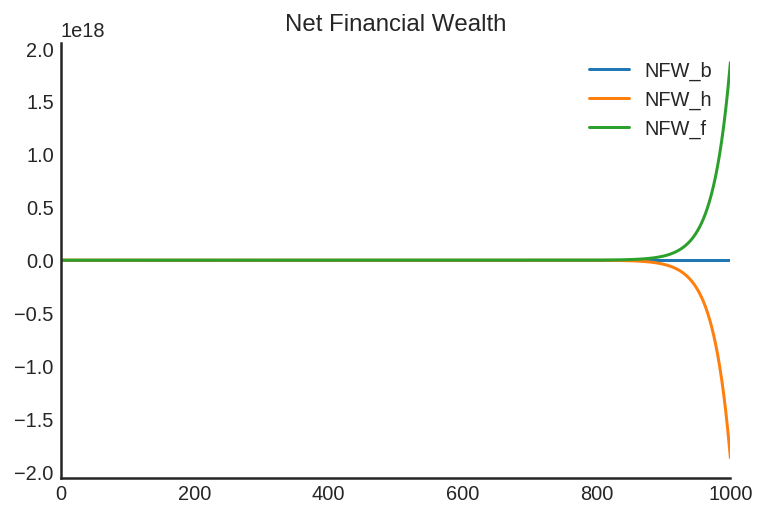

In [16]:
df[["NFW_b", "NFW_h", "NFW_f"]].plot(title = "Net Financial Wealth")
sns.despine()
plt.show()

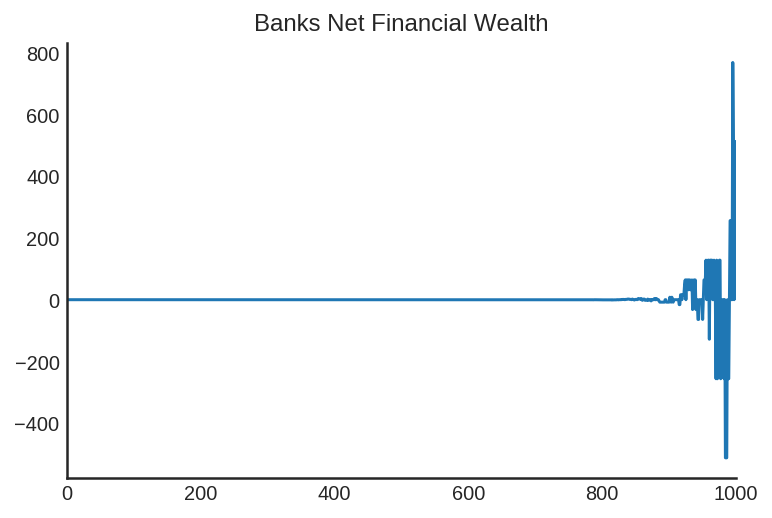

In [17]:
df['NFW_b'].plot(title = "Banks Net Financial Wealth")
sns.despine()
plt.show()

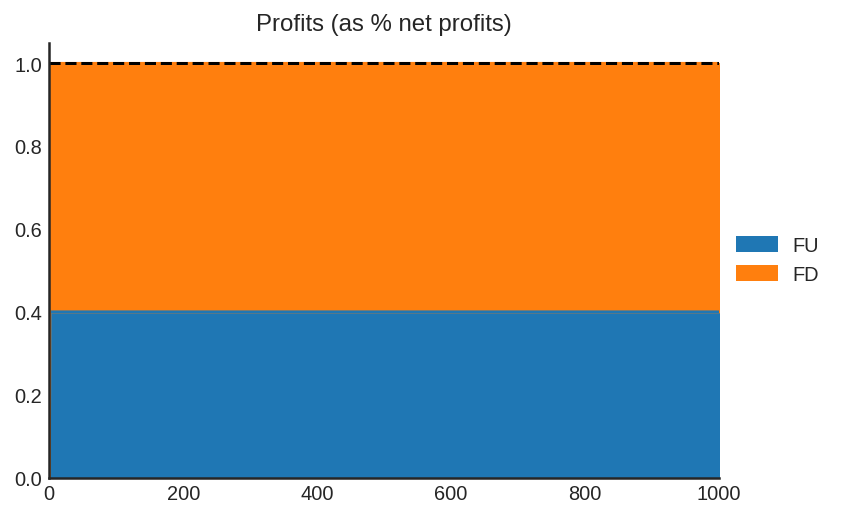

In [18]:
ax = df[["FU", "FD"]].apply(lambda x: x/df["Fn"]).plot(kind = "area", stacked = True, title = "Profits (as % net profits)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.axhline(y = 1, color = "black", ls = "--")
sns.despine()
plt.show()

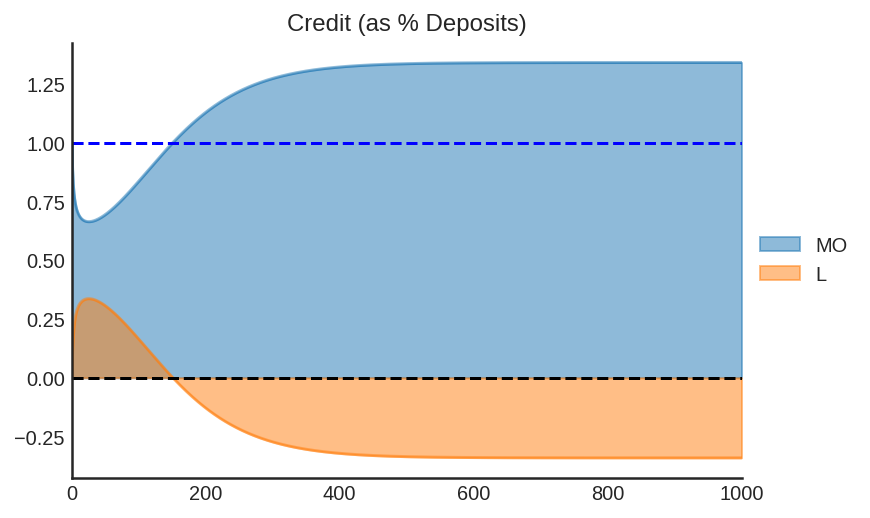

In [19]:
ax = df[["MO", "L"]].apply(lambda x: x/df["M"]).plot(kind = "area",stacked = False ,title = "Credit (as % Deposits)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.axhline(y = 1, color = "blue", ls = "--")
ax.axhline(y = 0, color = "black", ls = "--")
sns.despine()
plt.show()

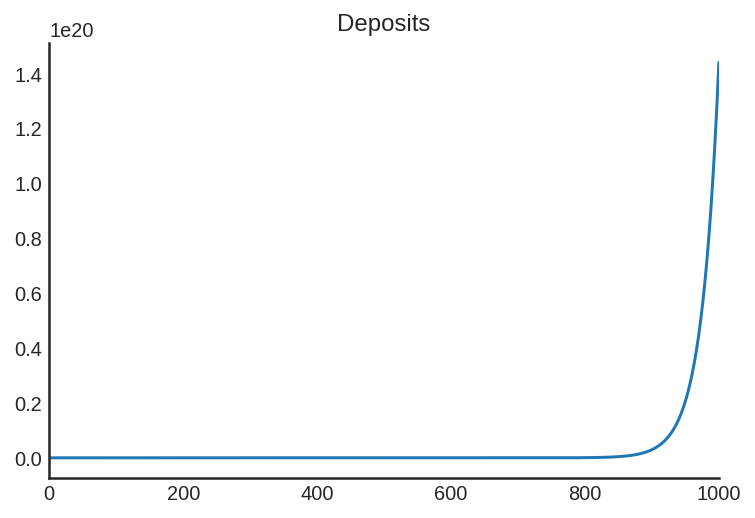

In [20]:
df["M"].plot(title = "Deposits")
sns.despine()
plt.show()

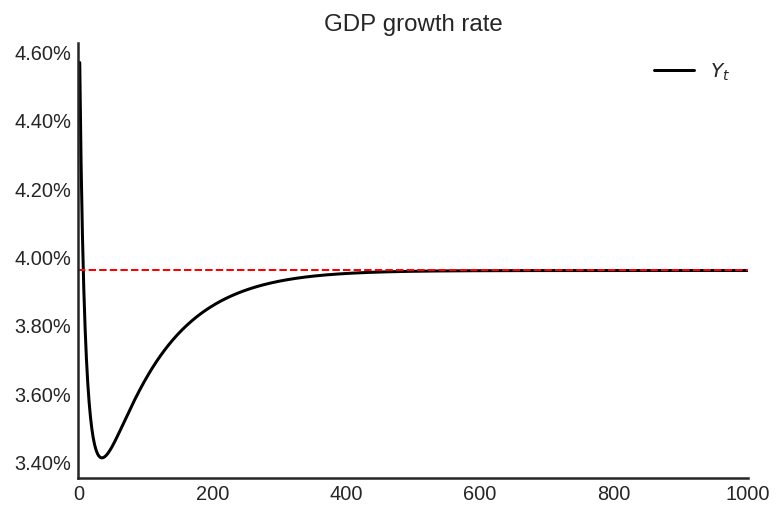

In [21]:
ax = df['Y'].pct_change().plot(color = "black", title = "GDP growth rate", label = "$Y_t$", legend = True)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
ax.axhline(y=df["g_Z"].iloc[-1], color = "red", ls = "--", lw=1, label = "Autonomous growth rate")
sns.despine()
plt.show()

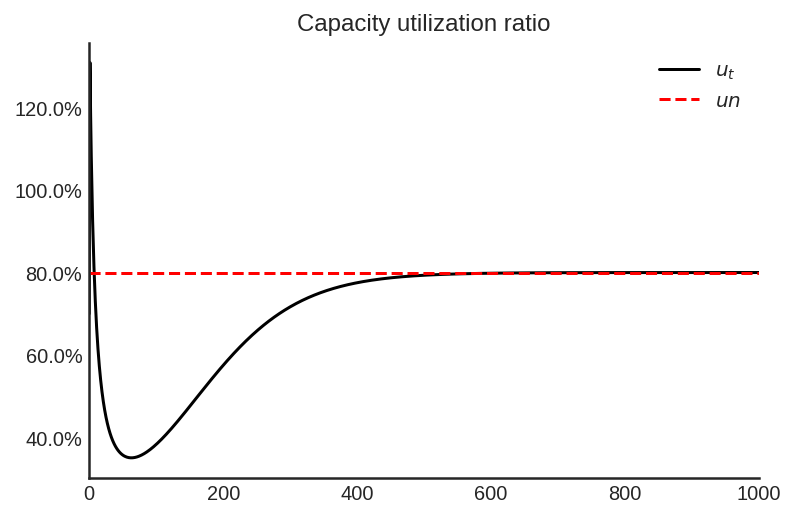

In [22]:
ax = df['u'].plot(color = "black", title = "Capacity utilization ratio", label = "$u_t$", legend = True)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
ax = df['un'].plot(color = "red", ls="--",  title = "Capacity utilization ratio", label = "$un$", legend = True)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

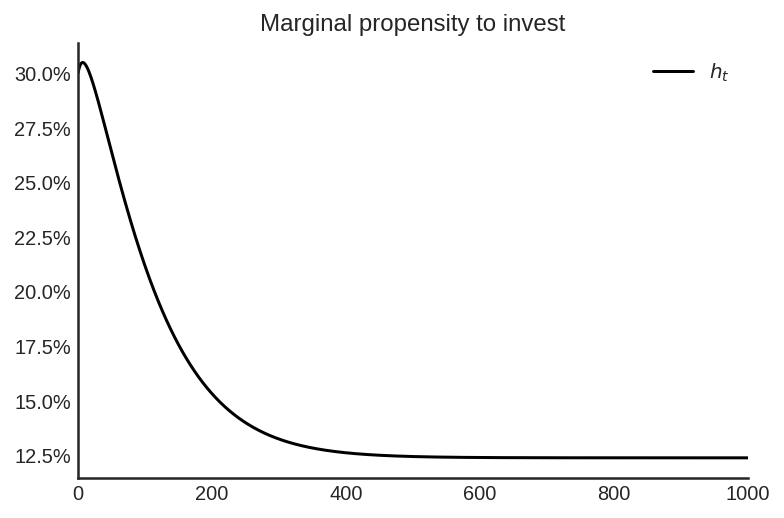

In [23]:
ax = df['h'].plot(color = "black", ls="-",  title = "Marginal propensity to invest", label = "$h_t$", legend = True)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

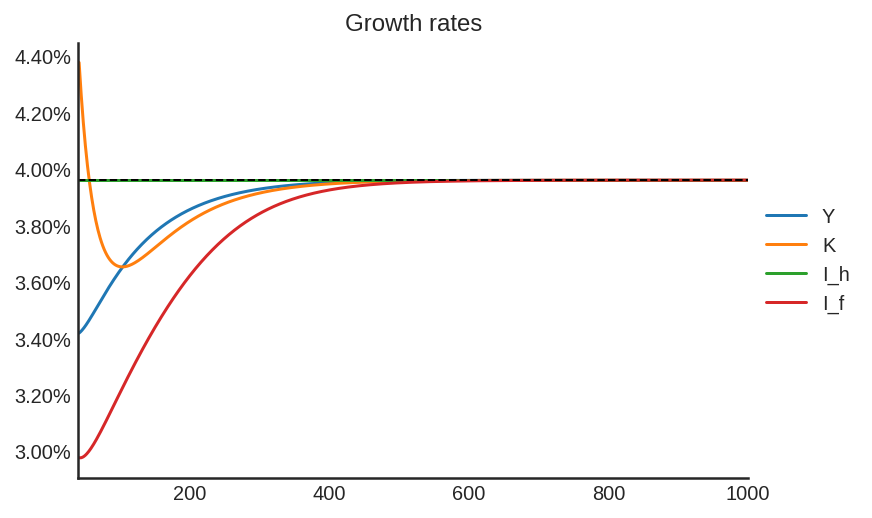

In [24]:
ax = df[["Y", "K", "I_h", "I_f"]][40:].pct_change().plot(title = "Growth rates")
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
ax.axhline(y=df["g_Z"].iloc[-1], color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()
plt.show()

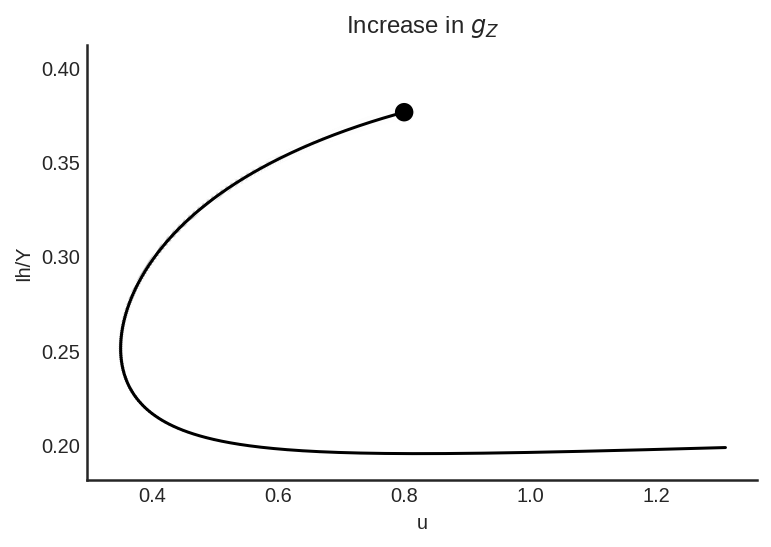

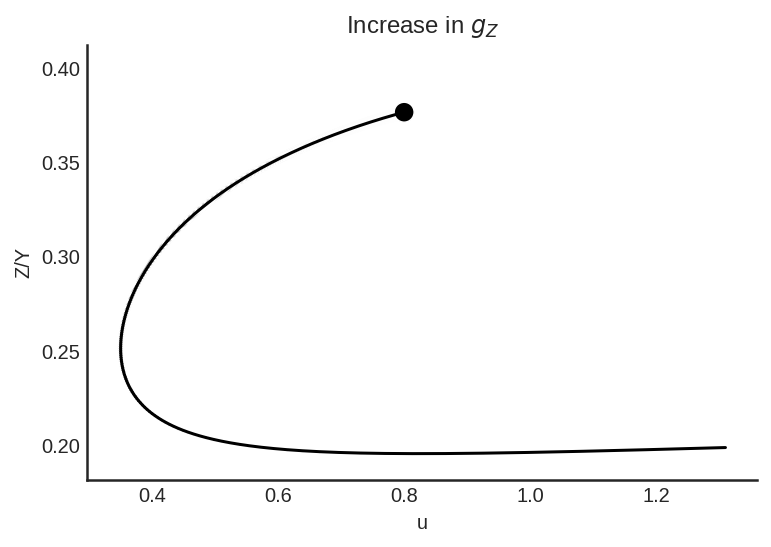

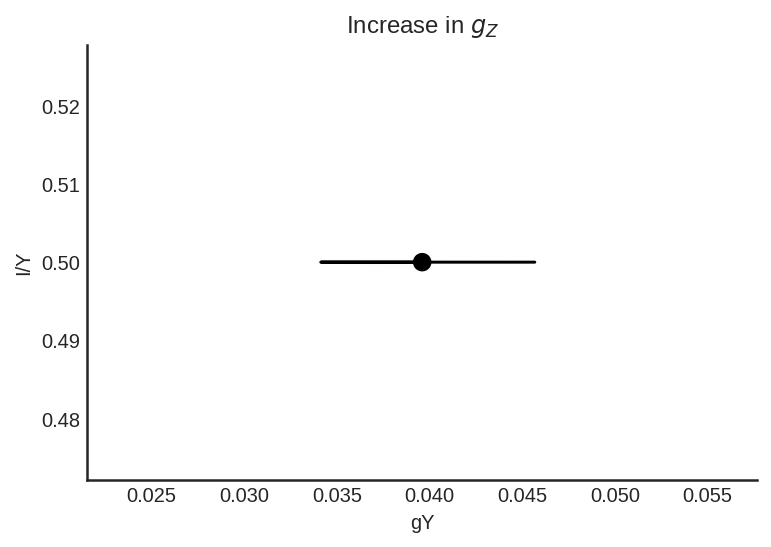

In [25]:
df["TIME"] = [i+1 for i in range(len(df.index))]
df["Ih/Y"] = df["I_h"]/df["Y"]
df["I/Y"] = df["I_t"]/df["Y"]
df["Z/Y"] = df["Z"]/df["Y"]
df["gY"] = df["Y"].pct_change()

sns.scatterplot(y = 'Ih/Y', x='u', data=df, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'Ih/Y', x='u', data=df, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

sns.scatterplot(y = 'Z/Y', x='u', data=df, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'Z/Y', x='u', data=df, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

sns.scatterplot(y = 'I/Y', x='gY', data=df, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'I/Y', x='gY', data=df, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

# Shocks

In [26]:
def plot_shock(filename, shock):
    """
    This function plots some selected variables
    
    filename: name to save the plot (str)
    shock: df returned by ShockModel function
    """
    sns.set_context('paper')
    fig, ax = plt.subplots(2,2)

    shock[["Y"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                      ls = ('--'),
                                                      )
    shock[["K"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                      ls = (':'),
                                                      )
    shock[["I_h"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                      ls = ('-'),
                                                      )
    shock[["I_f"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                      ls = ('-.'),
                                                      )
    ax[0,0].axhline(y=shock["g_Z"].iloc[-1], color = "black", ls = "--", lw=1)
    #ax[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in ax[0,0].get_yticks()])
    ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
                   labels = ["$Y$", "$K$", "$I_h$", "$I_f$"],
              fancybox=True, shadow=True, ncol=2)
    ax[0,0].ticklabel_format(useOffset=False)

    shock['k'].plot(color = "darkred", title = "Houses \nas % of total capital", label = "$\k$", legend = False, ax = ax[0,1], lw = 3, )
    ax[0,1].axhline(y = df['k'].iloc[-1], ls ='--', color = "gray")
    #ax[0,1].set_yticklabels(['{:,.3%}'.format(x) for x in ax[0,1].get_yticks()])
    ax[0,1].ticklabel_format(useOffset=False)


    shock['u'].plot(title = 'Capacity utilization ratio', ax=ax[1,0], legend = False, color = "darkred", lw = 3, )
    ax[1,0].axhline(y = shock['un'].iloc[-1], ls ='--', color = "gray")
    #ax[1,0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1,0].get_yticks()])
    ax[1,0].ticklabel_format(useOffset=False)

    shock['h'].plot(title = 'Marginal propensity to invest', ax=ax[1,1], legend = False, color = "darkred", lw = 3, )
    ax[1,1].axhline(y = df['h'].iloc[-1], ls ='--', color = "gray")
    ax[1,1].ticklabel_format(useOffset=False)
    
    sns.despine()
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    fig.savefig(filename, dpi = 300)

## Increase in autonomous growth rate ($g_z$)

In [27]:
base = model()
df = SolveSFC(base, time=900)
shock = ShockModel(base_model=base, create_function=model(), variable='phi_0', increase=0.01, time = 1200)
shock.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250
C,2.009740e+17,2.089325e+17,2.172062e+17,2.258076e+17,2.347496e+17,2.440456e+17,2.537098e+17,2.637567e+17,2.742014e+17,2.850598e+17,...,1.672939e+43,1.755917e+43,1.843011e+43,1.934424e+43,2.030371e+43,2.131078e+43,2.236779e+43,2.347723e+43,2.464171e+43,2.586393e+43
FD,1.322225e+17,1.374585e+17,1.429019e+17,1.485608e+17,1.544438e+17,1.605597e+17,1.669179e+17,1.735279e+17,1.803995e+17,1.875434e+17,...,1.047196e+43,1.099137e+43,1.153654e+43,1.210875e+43,1.270934e+43,1.333973e+43,1.400138e+43,1.469585e+43,1.542476e+43,1.618983e+43
FT,2.009740e+17,2.089325e+17,2.172062e+17,2.258076e+17,2.347496e+17,2.440456e+17,2.537098e+17,2.637567e+17,2.742014e+17,2.850598e+17,...,1.672939e+43,1.755917e+43,1.843011e+43,1.934424e+43,2.030371e+43,2.131078e+43,2.236779e+43,2.347723e+43,2.464171e+43,2.586393e+43
FU,8.814833e+16,9.163900e+16,9.526791e+16,9.904051e+16,1.029625e+17,1.070398e+17,1.112786e+17,1.156852e+17,1.202664e+17,1.250289e+17,...,6.981305e+42,7.327577e+42,7.691025e+42,8.072500e+42,8.472896e+42,8.893152e+42,9.334252e+42,9.797231e+42,1.028317e+43,1.079322e+43
Fn,2.203708e+17,2.290975e+17,2.381698e+17,2.476013e+17,2.574063e+17,2.675996e+17,2.781965e+17,2.892131e+17,3.006659e+17,3.125723e+17,...,1.745326e+43,1.831894e+43,1.922756e+43,2.018125e+43,2.118224e+43,2.223288e+43,2.333563e+43,2.449308e+43,2.570793e+43,2.698305e+43
I_f,4.974196e+16,5.171173e+16,5.375949e+16,5.588835e+16,5.810151e+16,6.040231e+16,6.279422e+16,6.528085e+16,6.786596e+16,7.055343e+16,...,5.186111e+42,5.443342e+42,5.713331e+42,5.996713e+42,6.294150e+42,6.606339e+42,6.934014e+42,7.277941e+42,7.638927e+42,8.017818e+42
I_h,1.512320e+17,1.572208e+17,1.634467e+17,1.699192e+17,1.766480e+17,1.836433e+17,1.909156e+17,1.984758e+17,2.063355e+17,2.145064e+17,...,1.154328e+43,1.211583e+43,1.271677e+43,1.334753e+43,1.400956e+43,1.470444e+43,1.543378e+43,1.619929e+43,1.700278e+43,1.784612e+43
I_t,2.009740e+17,2.089325e+17,2.172062e+17,2.258076e+17,2.347496e+17,2.440456e+17,2.537098e+17,2.637567e+17,2.742014e+17,2.850598e+17,...,1.672939e+43,1.755917e+43,1.843011e+43,1.934424e+43,2.030371e+43,2.131078e+43,2.236779e+43,2.347723e+43,2.464171e+43,2.586393e+43
Is,1.512320e+17,1.572208e+17,1.634467e+17,1.699192e+17,1.766480e+17,1.836433e+17,1.909156e+17,1.984758e+17,2.063355e+17,2.145064e+17,...,1.154328e+43,1.211583e+43,1.271677e+43,1.334753e+43,1.400956e+43,1.470444e+43,1.543378e+43,1.619929e+43,1.700278e+43,1.784612e+43
K,5.276092e+18,5.485024e+18,5.702231e+18,5.928038e+18,6.162788e+18,6.406833e+18,6.660543e+18,6.924300e+18,7.198501e+18,7.483561e+18,...,3.540155e+44,3.715747e+44,3.900048e+44,4.093490e+44,4.296528e+44,4.509635e+44,4.733313e+44,4.968086e+44,5.214503e+44,5.473142e+44


In [28]:
summary = SummaryShock(shock)
summary

,0,Shock,1,2,3,t-1,t,difference
C,1.401045e+18,1.470574e+18,1.543592e+18,1.620274e+18,1.700805e+18,2.464171e+43,2.586393e+43,1.222229e+42
FD,9.217614e+17,9.666919e+17,1.013868e+18,1.063403e+18,1.115414e+18,1.542476e+43,1.618983e+43,7.650681e+41
FT,1.401045e+18,1.470574e+18,1.543592e+18,1.620274e+18,1.700805e+18,2.464171e+43,2.586393e+43,1.222229e+42
FU,6.145076e+17,6.444612e+17,6.759120e+17,7.089351e+17,7.436095e+17,1.028317e+43,1.079322e+43,5.100454e+41
Fn,1.536269e+18,1.611153e+18,1.689780e+18,1.772338e+18,1.859024e+18,2.570793e+43,2.698305e+43,1.275114e+42
I_f,3.467617e+17,3.639984e+17,3.821299e+17,4.012036e+17,4.212690e+17,7.638927e+42,8.017818e+42,3.788908e+41
I_h,1.054283e+18,1.106576e+18,1.161462e+18,1.219070e+18,1.279536e+18,1.700278e+43,1.784612e+43,8.433378e+41
I_t,1.401045e+18,1.470574e+18,1.543592e+18,1.620274e+18,1.700805e+18,2.464171e+43,2.586393e+43,1.222229e+42
Is,1.054283e+18,1.106576e+18,1.161462e+18,1.219070e+18,1.279536e+18,1.700278e+43,1.784612e+43,8.433378e+41
K,3.678103e+19,3.825160e+19,3.979519e+19,4.141547e+19,4.311627e+19,5.214503e+44,5.473142e+44,2.586393e+43


In [29]:
shock1 = shock.round(decimals = 5).tail(1).transpose().loc['alpha':,:]
shock1.columns = ['$\Delta g_Z$']
shock1

,$\Delta g_Z$
alpha,1.0000
g_Z,0.0496
gamma_F,0.4000
gamma_u,0.0100
gk,0.0496
h,0.1550
infla,0.0000
inflaparam,0.0000
k,0.6900
omega,0.5000


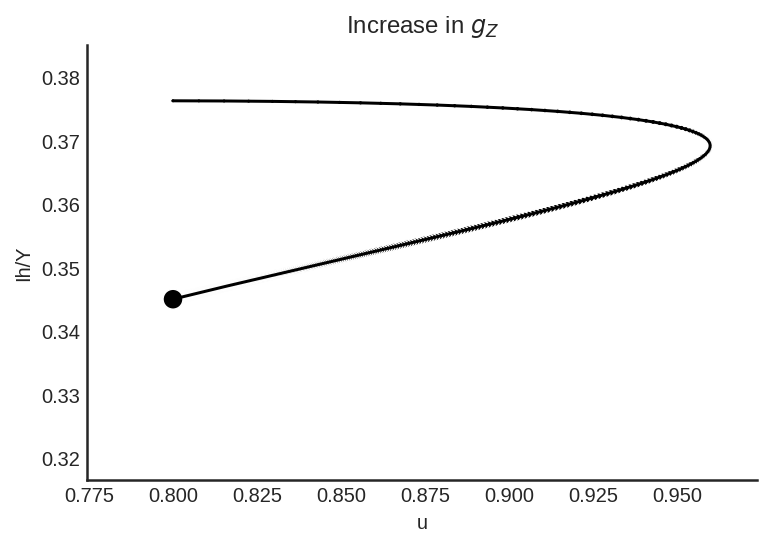

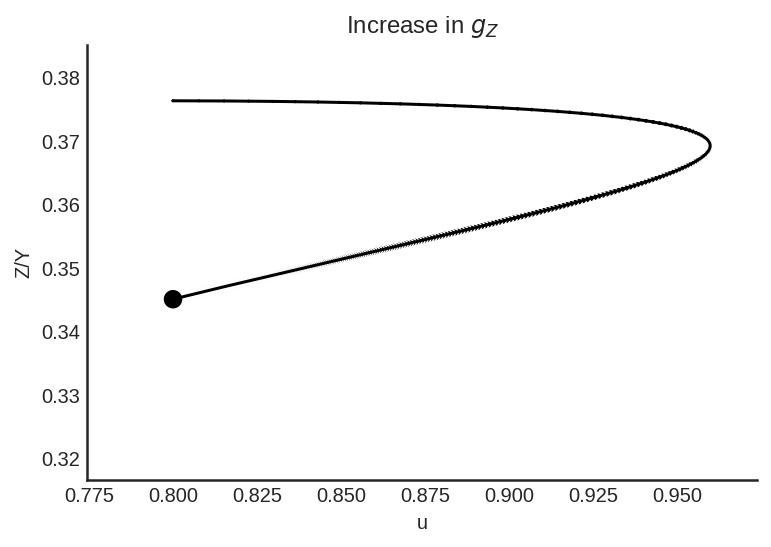

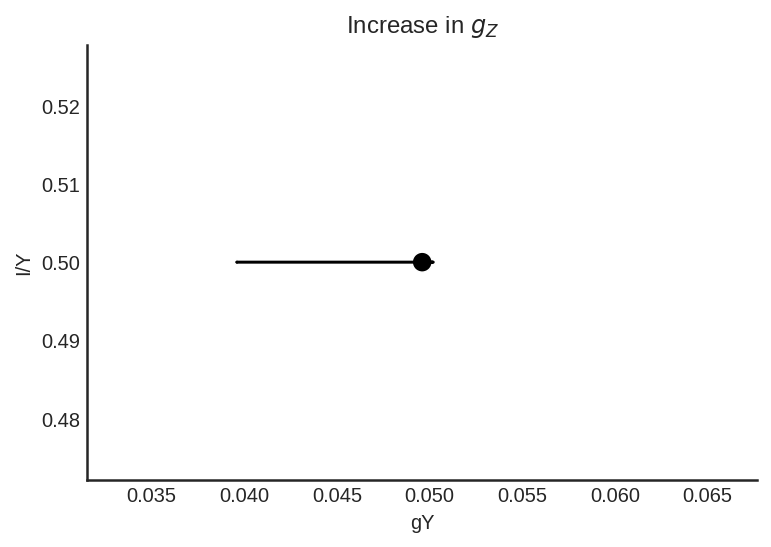

In [30]:
shock["TIME"] = [i+1 for i in range(len(shock.index))]
shock["Ih/Y"] = shock["I_h"]/shock["Y"]
shock["I/Y"] = shock["I_t"]/shock["Y"]
shock["Z/Y"] = shock["Z"]/shock["Y"]
shock["gY"] = shock["Y"].pct_change()

sns.scatterplot(y = 'Ih/Y', x='u', data=shock, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'Ih/Y', x='u', data=shock, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

sns.scatterplot(y = 'Z/Y', x='u', data=shock, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'Z/Y', x='u', data=shock, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

sns.scatterplot(y = 'I/Y', x='gY', data=shock, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'I/Y', x='gY', data=shock, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

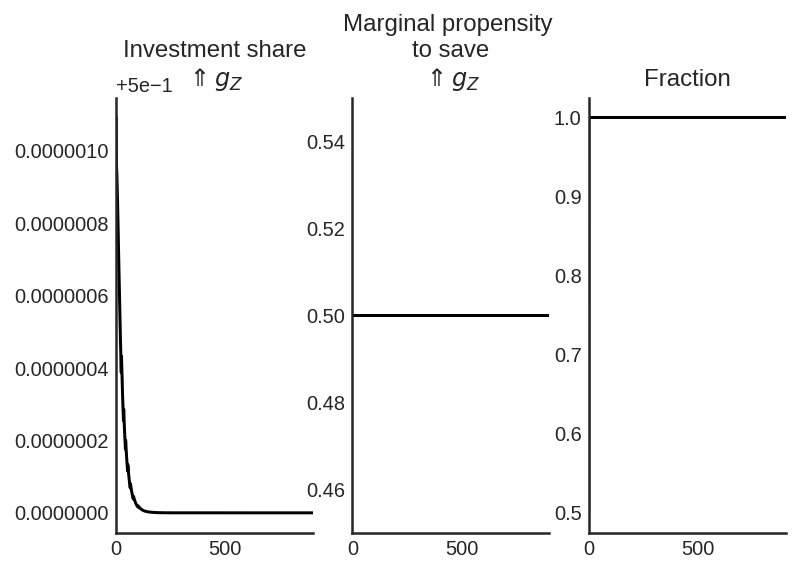

In [31]:
fig, ax = plt.subplots(1,3)

(df['I_t']/df['Y']).plot(title = 'Investment share\n$\\Uparrow g_Z$', color = 'black', ax = ax[0])
(1 - df['omega']).plot(title = 'Marginal propensity \nto save\n$\\Uparrow g_Z$', color = 'black', ax = ax[1])
ax[1].set_ylim(.45,.55)
(df['I_t']/(df['I_t'] + df['N'])).plot(title = 'Fraction', color = 'black', ax = ax[2])

sns.despine()
plt.show()

### Plots

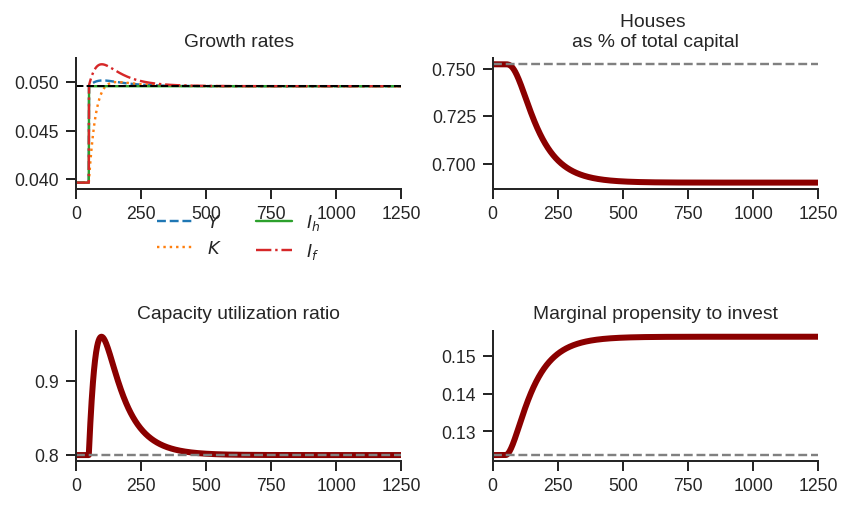

In [32]:
plot_shock(shock = shock, filename = 'Shock_1.png')

## Increase in wage-share ($\omega$)

In [33]:
base = model()
df = SolveSFC(base, time=700)
shock = ShockModel(base_model=base, create_function=model(), variable='omegapar', increase=0.05, time = 900)
shock.transpose()

,0,1,2,3,4,5,6,7,8,9,...,941,942,943,944,945,946,947,948,949,950
C,8.509925e+13,8.846906e+13,9.197231e+13,9.561429e+13,9.940048e+13,1.033366e+14,1.074286e+14,1.116826e+14,1.161051e+14,1.207027e+14,...,8.023478e+29,8.341207e+29,8.671519e+29,9.014911e+29,9.371902e+29,9.743029e+29,1.012885e+30,1.052996e+30,1.094694e+30,1.138044e+30
FD,5.598379e+13,5.820072e+13,6.050545e+13,6.290144e+13,6.539231e+13,6.798183e+13,7.067388e+13,7.347254e+13,7.638203e+13,7.940673e+13,...,4.250412e+29,4.418728e+29,4.593709e+29,4.775620e+29,4.964735e+29,5.161338e+29,5.365727e+29,5.578210e+29,5.799107e+29,6.028752e+29
FT,8.509925e+13,8.846906e+13,9.197231e+13,9.561429e+13,9.940048e+13,1.033366e+14,1.074286e+14,1.116826e+14,1.161051e+14,1.207027e+14,...,6.564664e+29,6.824624e+29,7.094879e+29,7.375837e+29,7.667920e+29,7.971569e+29,8.287243e+29,8.615418e+29,8.956589e+29,9.311270e+29
FU,3.732252e+13,3.880048e+13,4.033697e+13,4.193429e+13,4.359488e+13,4.532122e+13,4.711592e+13,4.898169e+13,5.092135e+13,5.293782e+13,...,2.833608e+29,2.945819e+29,3.062473e+29,3.183747e+29,3.309823e+29,3.440892e+29,3.577152e+29,3.718807e+29,3.866072e+29,4.019168e+29
Fn,9.330631e+13,9.700120e+13,1.008424e+14,1.048357e+14,1.089872e+14,1.133030e+14,1.177898e+14,1.224542e+14,1.273034e+14,1.323445e+14,...,7.084019e+29,7.364546e+29,7.656182e+29,7.959367e+29,8.274558e+29,8.602231e+29,8.942879e+29,9.297017e+29,9.665179e+29,1.004792e+30
I_f,2.106835e+13,2.190254e+13,2.276976e+13,2.367131e+13,2.460857e+13,2.558293e+13,2.659588e+13,2.764894e+13,2.874369e+13,2.988179e+13,...,1.805283e+29,1.876772e+29,1.951092e+29,2.028356e+29,2.108679e+29,2.192182e+29,2.278993e+29,2.369241e+29,2.463063e+29,2.560600e+29
I_h,6.403090e+13,6.656652e+13,6.920255e+13,7.194297e+13,7.479192e+13,7.775368e+13,8.083272e+13,8.403370e+13,8.736143e+13,9.082095e+13,...,4.759381e+29,4.947852e+29,5.143787e+29,5.347481e+29,5.559241e+29,5.779387e+29,6.008251e+29,6.246178e+29,6.493526e+29,6.750670e+29
I_t,8.509925e+13,8.846906e+13,9.197231e+13,9.561429e+13,9.940048e+13,1.033366e+14,1.074286e+14,1.116826e+14,1.161051e+14,1.207027e+14,...,6.564664e+29,6.824624e+29,7.094879e+29,7.375837e+29,7.667920e+29,7.971569e+29,8.287243e+29,8.615418e+29,8.956589e+29,9.311270e+29
Is,6.403090e+13,6.656652e+13,6.920255e+13,7.194297e+13,7.479192e+13,7.775368e+13,8.083272e+13,8.403370e+13,8.736143e+13,9.082095e+13,...,4.759381e+29,4.947852e+29,5.143787e+29,5.347481e+29,5.559241e+29,5.779387e+29,6.008251e+29,6.246178e+29,6.493526e+29,6.750670e+29
K,2.234191e+15,2.322660e+15,2.414632e+15,2.510246e+15,2.609647e+15,2.712984e+15,2.820412e+15,2.932095e+15,3.048200e+15,3.168903e+15,...,1.723390e+31,1.791636e+31,1.862585e+31,1.936344e+31,2.013023e+31,2.092738e+31,2.175611e+31,2.261765e+31,2.351331e+31,2.444444e+31


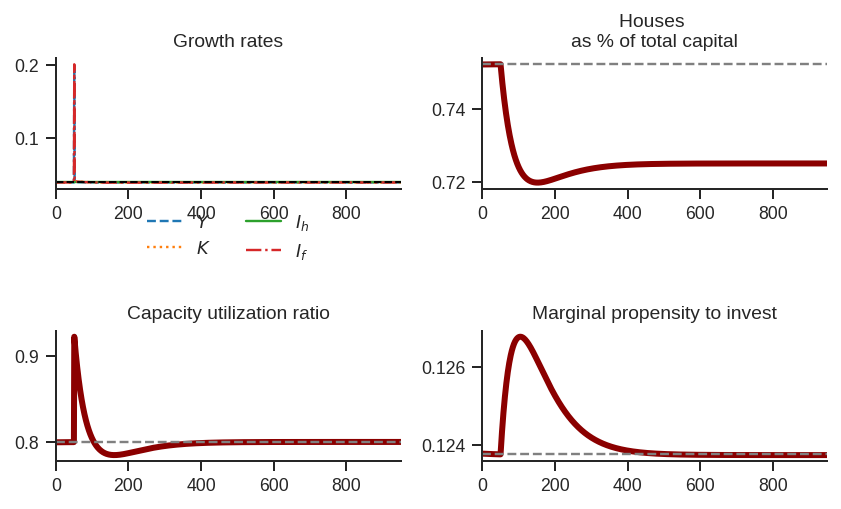

In [34]:
plot_shock(shock = shock, filename = 'Shock_2.png')

In [35]:
shock2 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock2.columns = ['$\Delta \omega$']
shock2

,$\Delta \omega$
alpha,1.000
g_Z,0.040
gamma_F,0.400
gamma_u,0.010
gk,0.040
h,0.124
infla,0.000
inflaparam,0.000
k,0.725
omega,0.550


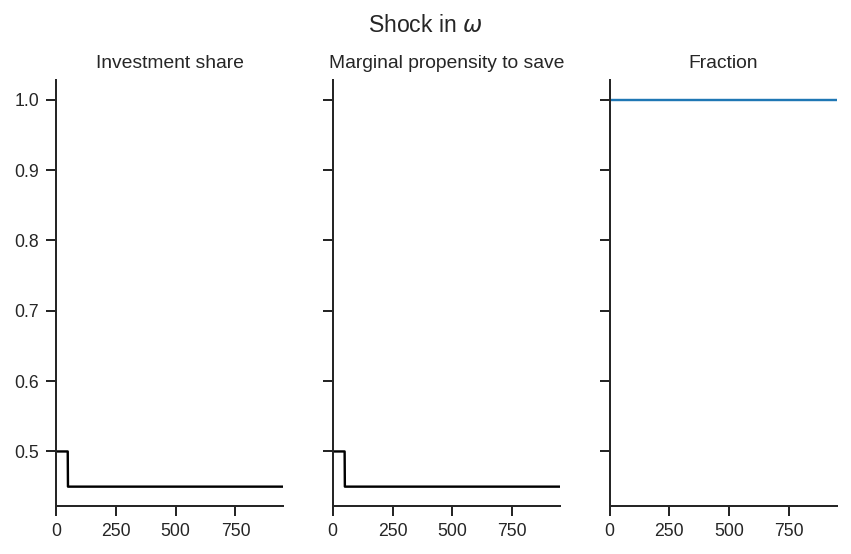

In [36]:
fig, ax = plt.subplots(1,3, sharey=True)

(shock['I_t']/shock['Y']).plot(title = 'Investment share', color = 'black', ax = ax[0])
ax[0].ticklabel_format(useOffset=False)
(1 - shock['omega']).plot(title = 'Marginal propensity to save', color = 'black', ax = ax[1])
ax[1].ticklabel_format(useOffset=False)
(shock['I_f']/(shock['I_f'] + shock['N'])).plot(title = 'Fraction')
ax[2].ticklabel_format(useOffset=False)

fig.suptitle('Shock in $\omega$')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
sns.despine()
plt.show()

## Increase in interest rates

In [37]:
base = model()
df = SolveSFC(base, time=1000)
shock = ShockModel(base_model=base, create_function=model(), variable='spread_mo', increase=0.005, time = 1000)
shock.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050
C,9.767085e+18,1.015386e+19,1.055595e+19,1.097397e+19,1.140854e+19,1.186032e+19,1.232998e+19,1.281825e+19,1.332585e+19,1.385356e+19,...,3.204718e+36,3.331307e+36,3.462888e+36,3.599672e+36,3.741862e+36,3.889662e+36,4.043304e+36,4.203014e+36,4.369034e+36,4.541618e+36
FD,6.425870e+18,6.680334e+18,6.944875e+18,7.219892e+18,7.505800e+18,7.803029e+18,8.112029e+18,8.433266e+18,8.767223e+18,9.114405e+18,...,2.109772e+36,2.193110e+36,2.279734e+36,2.369784e+36,2.463392e+36,2.560694e+36,2.661842e+36,2.766984e+36,2.876280e+36,2.989898e+36
FT,9.767085e+18,1.015386e+19,1.055595e+19,1.097397e+19,1.140854e+19,1.186032e+19,1.232998e+19,1.281825e+19,1.332585e+19,1.385356e+19,...,3.204718e+36,3.331307e+36,3.462888e+36,3.599672e+36,3.741862e+36,3.889662e+36,4.043304e+36,4.203014e+36,4.369034e+36,4.541618e+36
FU,4.283913e+18,4.453556e+18,4.629917e+18,4.813261e+18,5.003867e+18,5.202020e+18,5.408020e+18,5.622177e+18,5.844815e+18,6.076270e+18,...,1.406515e+36,1.462073e+36,1.519823e+36,1.579856e+36,1.642261e+36,1.707129e+36,1.774561e+36,1.844656e+36,1.917520e+36,1.993265e+36
Fn,1.070978e+19,1.113389e+19,1.157479e+19,1.203315e+19,1.250967e+19,1.300505e+19,1.352005e+19,1.405544e+19,1.461204e+19,1.519067e+19,...,3.516287e+36,3.655183e+36,3.799557e+36,3.949640e+36,4.105654e+36,4.267824e+36,4.436403e+36,4.611641e+36,4.793800e+36,4.983163e+36
I_f,2.417364e+18,2.513092e+18,2.612610e+18,2.716069e+18,2.823625e+18,2.935441e+18,3.051684e+18,3.172530e+18,3.298162e+18,3.428769e+18,...,7.911647e+35,8.224165e+35,8.549004e+35,8.886690e+35,9.237722e+35,9.602604e+35,9.981907e+35,1.037619e+36,1.078605e+36,1.121212e+36
I_h,7.349721e+18,7.640770e+18,7.943344e+18,8.257900e+18,8.584913e+18,8.924876e+18,9.278301e+18,9.645722e+18,1.002769e+19,1.042479e+19,...,2.413557e+36,2.508893e+36,2.607994e+36,2.711010e+36,2.818095e+36,2.929409e+36,3.045121e+36,3.165403e+36,3.290437e+36,3.420409e+36
I_t,9.767085e+18,1.015386e+19,1.055595e+19,1.097397e+19,1.140854e+19,1.186032e+19,1.232998e+19,1.281825e+19,1.332585e+19,1.385356e+19,...,3.204721e+36,3.331309e+36,3.462893e+36,3.599678e+36,3.741866e+36,3.889669e+36,4.043310e+36,4.203021e+36,4.369041e+36,4.541621e+36
Is,7.349721e+18,7.640770e+18,7.943344e+18,8.257900e+18,8.584913e+18,8.924876e+18,9.278301e+18,9.645722e+18,1.002769e+19,1.042479e+19,...,2.413557e+36,2.508893e+36,2.607994e+36,2.711010e+36,2.818095e+36,2.929409e+36,3.045121e+36,3.165403e+36,3.290437e+36,3.420409e+36
K,2.564109e+20,2.665647e+20,2.771207e+20,2.880946e+20,2.995032e+20,3.113635e+20,3.236935e+20,3.365117e+20,3.498376e+20,3.636911e+20,...,8.433691e+37,8.766822e+37,9.113112e+37,9.473079e+37,9.847266e+37,1.023623e+38,1.064056e+38,1.106087e+38,1.149777e+38,1.195193e+38


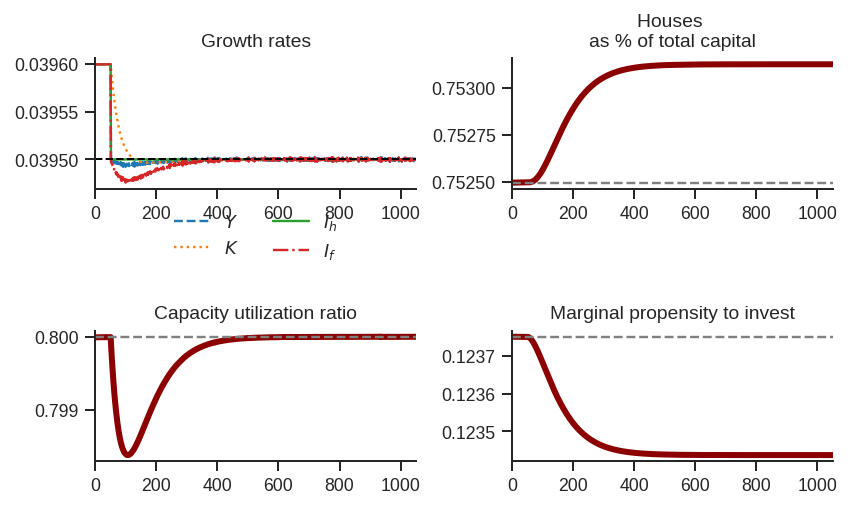

In [38]:
plot_shock(shock = shock, filename = 'Shock_3.png')

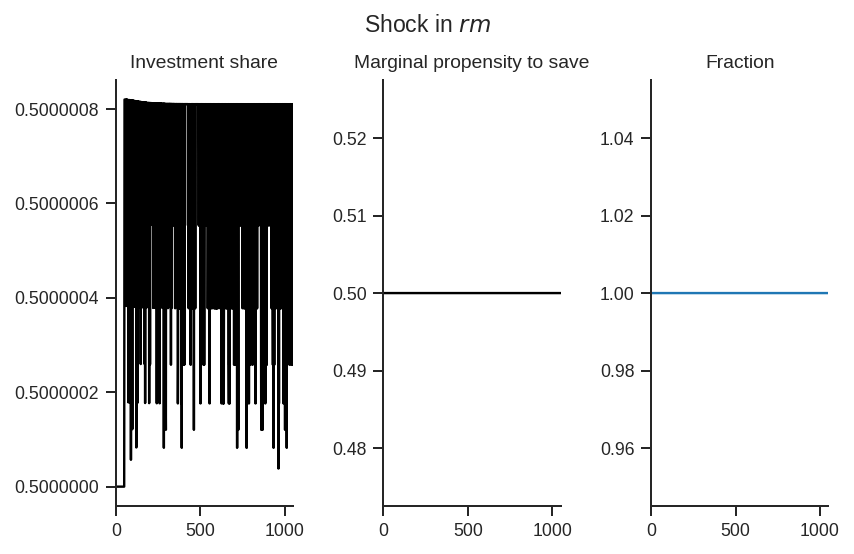

In [39]:
fig, ax = plt.subplots(1,3)

(shock['I_t']/shock['Y']).plot(title = 'Investment share', color = 'black', ax = ax[0])
ax[0].ticklabel_format(useOffset=False)
(1 - shock['omega']).plot(title = 'Marginal propensity to save', color = 'black', ax = ax[1])
ax[1].ticklabel_format(useOffset=False)
(shock['I_t']/(shock['I_t'] + shock['N'])).plot(title = 'Fraction')
ax[2].ticklabel_format(useOffset=False)

fig.suptitle('Shock in $rm$')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
sns.despine()
plt.show()

In [40]:
shock3 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock3.columns = ['$\Delta rm$']
shock3

,$\Delta rm$
alpha,1.000
g_Z,0.040
gamma_F,0.400
gamma_u,0.010
gk,0.040
h,0.123
infla,0.000
inflaparam,0.000
k,0.753
omega,0.500


## Increase in inflation

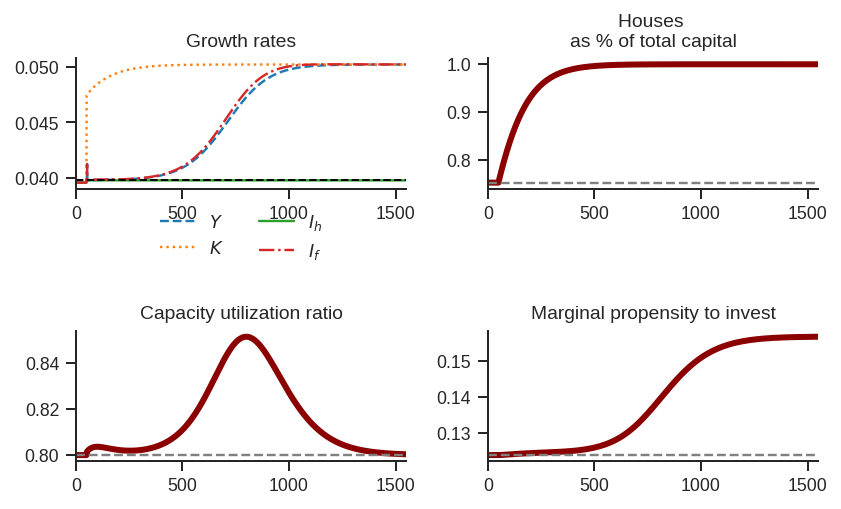

In [41]:
base = model()
df = SolveSFC(base, time=1000)
shock = ShockModel(base_model=base, create_function=model(), variable='inflaparam', increase=0.01, time = 1500)

plot_shock(shock = shock, filename = 'Shock_4.png')

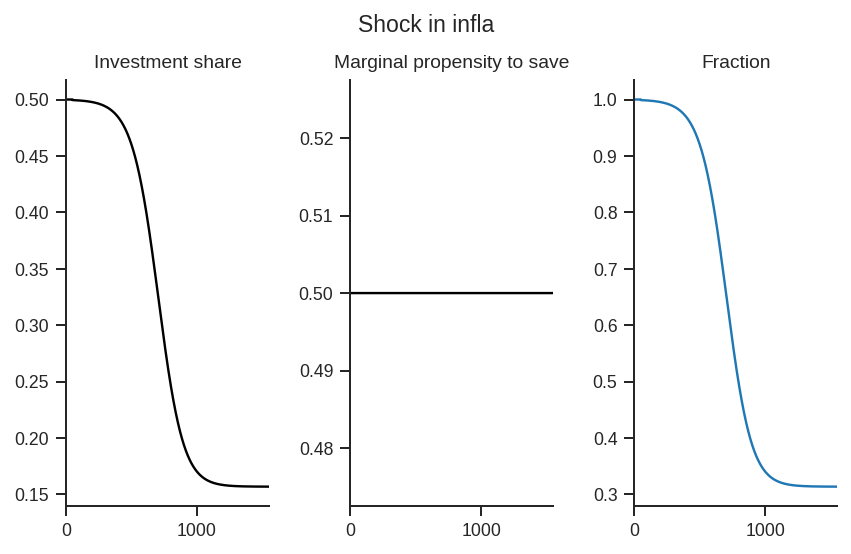

In [42]:
fig, ax = plt.subplots(1,3)

(shock['I_t']/shock['Y']).plot(title = 'Investment share', color = 'black', ax = ax[0])
ax[0].ticklabel_format(useOffset=False)
(1 - shock['omega']).plot(title = 'Marginal propensity to save', color = 'black', ax = ax[1])
ax[1].ticklabel_format(useOffset=False)
(shock['I_t']/(shock['I_t'] + shock['N'])).plot(title = 'Fraction')
ax[2].ticklabel_format(useOffset=False)

fig.suptitle('Shock in infla')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
sns.despine()
plt.show()

In [43]:
shock4 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock4.columns = ['$\Delta $ Infla']
shock4

,$\Delta $ Infla
alpha,1.000
g_Z,0.040
gamma_F,0.400
gamma_u,0.010
gk,0.050
h,0.157
infla,0.010
inflaparam,0.010
k,1.000
omega,0.500


# Shock yourself

In [44]:
df_ = SolveSFC(base, time=1000)

@interact(variable = df_.transpose().loc['alpha':,:].index, increase = (-1,1,0.01))
def shock_yourself(variable, increase):
  shock = ShockModel(base_model = base, create_function = model(), variable = variable, increase = increase)
  plot_shock(shock = shock, filename = 'SelfShock.png')

# Merging tables

In [45]:
df = df.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
df.columns = ['Base scenario']
df

table = pd.merge(left = df, right = shock1, left_index = True, right_index = True)
table = pd.merge(left = table, right = shock2, left_index = True, right_index = True)
table = pd.merge(left = table, right = shock3, left_index = True, right_index = True)
table = pd.merge(left = table, right = shock4, left_index = True, right_index = True)
table.to_latex("table.tex", bold_rows = True, column_format = 'c', decimal = ',')
table

,Base scenario,$\Delta g_Z$,$\Delta \omega$,$\Delta rm$,$\Delta $ Infla
alpha,1.000,1.0000,1.000,1.000,1.000
g_Z,0.040,0.0496,0.040,0.040,0.040
gamma_F,0.400,0.4000,0.400,0.400,0.400
gamma_u,0.010,0.0100,0.010,0.010,0.010
gk,0.040,0.0496,0.040,0.040,0.050
h,0.124,0.1550,0.124,0.123,0.157
infla,0.000,0.0000,0.000,0.000,0.010
inflaparam,0.000,0.0000,0.000,0.000,0.010
k,0.752,0.6900,0.725,0.753,1.000
omega,0.500,0.5000,0.550,0.500,0.500


# Dag

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


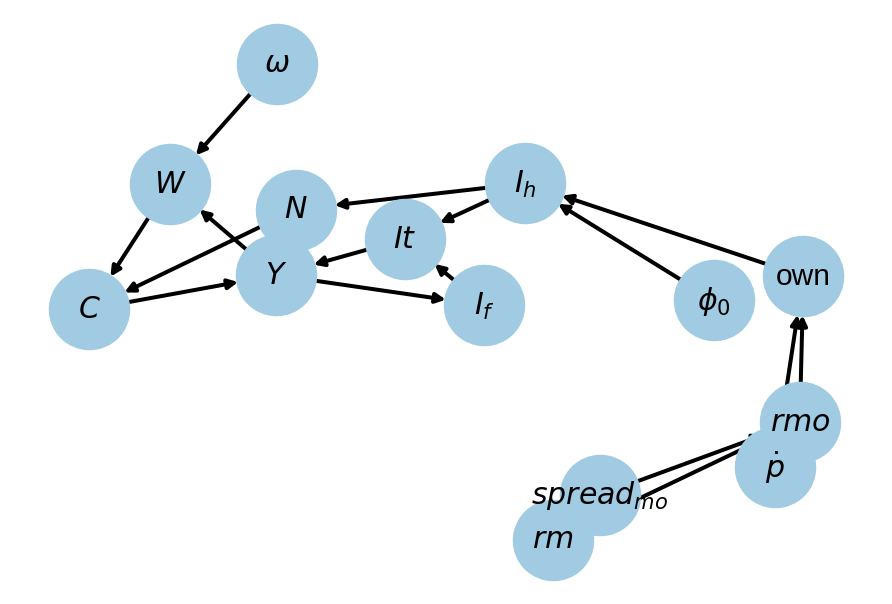

In [46]:
df = pd.DataFrame(
    {
        'Determinada' : [
            '$Y$', # 1
            '$Y$', # 2
            '$C$', # 3
            '$C$', # 4
            '$W$', # 5
            '$N$', # 6
            '$It$', # 7
            '$It$', # 8
            '$I_h$', # 9
            'own', # 10
            'own', # 11
            '$I_f$', # 12
            '$I_h$', # 13
            '$rmo$', # 14
            '$rmo$', # 15,
            '$W$', # 16
        ], 
        'Determina' : [
            '$C$',  # 1
            '$It$', # 2
            '$W$', # 3
            '$N$', # 4
            '$\omega$', # 5
            '$I_h$', # 6
            '$I_f$', # 7
            '$I_h$', # 8
            'own', # 9
            '$\dot p$', # 10
            '$rmo$', # 11
            '$Y$', # 12,
            '$\phi_0$', # 13
            '$rm$', # 14
            '$spread_{mo}$', # 15
            '$Y$', # 16
        ]
}
)
 
# Build your graph
G=nx.from_pandas_edgelist(
    df, 
    'Determina', 
    'Determinada', 
    create_using=nx.DiGraph() # To use with arrows
)
 
# Plot it
nx.draw(
    G, 
    with_labels=True, 
    node_color='#A0CBE2', 
    node_size=1500, 
    edge_color='black', 
    linewidths=2,
    width=2,
    arrows=True,
    font_size=15,
    alpha=1,
    #pos=nx.spring_layout(G),
    pos=nx.fruchterman_reingold_layout(G),
    #pos=nx.shell_layout(G),
)

plt.show()

# Analytical solution

In [47]:
base_eq = model()
SolveSFC(base_eq, time=1, table = False)
t = sp.Symbol('t')
initials = {
    key: base_eq.evaluate(key) for key in base_eq.parameters
}
initials.update({key: base_eq.evaluate(key) for key in base_eq.variables})

for i in base_eq.variables:
  globals()["_" + i] = sp.Function(i)
  
for i in base_eq.parameters:
  globals()[i] = sp.symbols(i, positive=True)

## General equations

In [48]:
Y = _C(t) + _I_t(t)
I = _I_f(t) + _I_h(t)
Yk = _K_f(t-1)/v
u = _Y(t)/_Yk(t)
Z = _I_h(t) + _N(t)
W = _omega(t)*_Y(t)
K = _K_HD(t) + _K_f(t)

## Households

In [49]:
C = alpha*_W(t) + _N(t)
YD = _W(t) + _FD(t) + rm*_M(t-1) - _rmo(t)*_MO(t-1) - _rl(t)*_Lh(t)
S_h = _YD(t) - _C(t)
dMO = _I_h(t)
V_h = _M(t) + _K_HD(t) - _MO(t)
NFW_h = _S_h(t) - _I_h(t)
N = Theta*_I_h(t-2)

## Firms

In [50]:
I_f = _h(t)*_Y(t)
dK_f = _I_f(t)
Lf = _I_f(t) - _FU(t) + _L(t-1)
FT = _FU(t) + _FD(t)
FU = gamma_F*(_FT(t) - _rl(t)*_L(t-1))
FD = (1 - gamma_F)*(_FT(t) - _rl(t)*_L(t-1))
h = _h(t-1)*gamma_u*(_u(t)-un) + _h(t-1)
NFW_f = _FU(t) - _I_f(t)
V_f = _K_f(t) - _L(t)

## Banks

In [51]:
L = _Lf(t) + _Lh(t)
M = (_L(t) - _L(t-1)) + (_MO(t) - _MO(t-1)) + _M(t-1)
rmo = rm + spread_mo
rl = rm + spread_l
V_b = _L(t) + _MO(t) - _M(t)
NFW_b = _rl(t)*_L(t-1) + _rmo(t)*_MO(t-1) - rm*_M(t-1)

## Residential Investment

In [52]:
K_HS = _K_HD(t)
Is = _I_h(t)
dK_HD = _I_h(t)
I_h = (1+_g_Z(t))*_I_h(t-1)
k = _K_HD(t-1)/(_Kreal(t-1))
infla = inflaparam
ph = (1+_infla(t))*_ph(t-1)
own = ((1+_rmo(t))/(1+_infla(t)))-1
g_Z = phi_0 - phi_1*_own(t)

## Short-run

$$
g_Z = \overline g_Z \Leftrightarrow Z = \overline Z
$$

In [53]:
g = sp.Function('g')
gK = sp.Function('g_K')

def replacer(express, discart=20, extra_time=20):
  #print("\nReplacing the initial values.....")
  df = SolveSFC(model(), time = discart+extra_time)
  df = df.iloc[discart:,:]
  
  express = express.subs(alpha, df.loc[discart+2, 'alpha']).subs(_omega(t), df.loc[discart+2, 'omega'])
  express  = express.subs(un, df.loc[discart+1, 'un']).subs(gamma_u, df.loc[discart+1, 'gamma_u'])
  express = express.subs(_u(t), df.loc[discart+2, 'u']).subs(_h(t-1), df.loc[discart+1, 'h'])
  express = express.subs(own, df.loc[discart+2, 'own']).subs(inflaparam, df.loc[discart+1, 'infla']).subs(_I_h(t-1), df.loc[discart+1, 'I_h'])
  express = express.subs(phi_0, df.loc[discart+1, 'phi_0']).subs(phi_1, df.loc[discart+1, 'phi_1']).subs(rm, df.loc[discart+1, 'rm']).subs(spread_mo, df.loc[discart+1, 'spread_mo'])
  express = express.subs(_h(t), df.loc[discart+1, 'h']).subs(_rmo(t), df.loc[discart+1, 'rmo']).subs(rm, df.loc[discart+1, 'rm']).subs(spread_mo, df.loc[discart+1, 'spread_mo'])
  express = express.subs(_I_h(t), df.loc[discart+1, 'I_h']).subs(gz_, df.loc[discart+1, 'g_Z'])
  return express

In [54]:
EqY = Y - _Y(t)
EqY = EqY.subs(_C(t), C).subs(_I_t(t), I)
EqY = EqY.subs(_I_f(t), I_f)
EqY = EqY.subs(_W(t), W)
EqY = EqY.subs(_N(t) + _I_h(t), _Z(t))

EqY = sp.solve(EqY, _Y(t))[0].collect(alpha).collect(omegapar)
solY = EqY
pprint(cse(solY, optimizations='basic')[1], use_unicode=True)
print('dY/d alpha = ', EqY.diff(alpha))
print('dY/d omega = ', EqY.diff(_omega(t)))

print("\nGowth rate.....")
gY, h_, gz_ = sp.symbols('gY h gZ')
gY_ = alpha*_omega(t)*gY + _h(t)*gY +_h(t) - _h(t-1) + (_Z(t)/_Y(t))*_g_Z(t) - gY
gY_ = gY_.subs(_g_Z(t), gz_).subs(_Y(t), solY).subs(_g_Z(t), gz_)
gY_ = gY_.subs(_h(t), h)
gY_ = sp.solve(gY_, gY)[0].collect(gz_)
pprint(sp.Eq(g(t), sp.simplify(gY_)))

print('\nd gY/ d alpha\n')
pprint(gY_.diff(alpha))
print('\nd gY/ d omega\n')
pprint(gY_.diff(_omega(t)))


⎡      -Z(t)      ⎤
⎢─────────────────⎥
⎣α⋅ω(t) + h(t) - 1⎦
dY/d alpha =  Z(t)*omega(t)/(alpha*omega(t) + h(t) - 1)**2
dY/d omega =  alpha*Z(t)/(alpha*omega(t) + h(t) - 1)**2

Gowth rate.....
       gZ⋅(α⋅ω(t) - γᵤ⋅un⋅h(t - 1) + γᵤ⋅h(t - 1)⋅u(t) + h(t - 1) - 1) + γᵤ⋅un⋅
g(t) = ───────────────────────────────────────────────────────────────────────
                           α⋅ω(t) - γᵤ⋅un⋅h(t - 1) + γᵤ⋅h(t - 1)⋅u(t) + h(t - 

h(t - 1) - γᵤ⋅h(t - 1)⋅u(t)
───────────────────────────
1) - 1                     

d gY/ d alpha

                         gZ⋅ω(t)                            (gZ⋅(α⋅ω(t) - γᵤ⋅u
───────────────────────────────────────────────────────── - ──────────────────
α⋅ω(t) - γᵤ⋅un⋅h(t - 1) + γᵤ⋅h(t - 1)⋅u(t) + h(t - 1) - 1                     
                                                                              

n⋅h(t - 1) + γᵤ⋅h(t - 1)⋅u(t) + h(t - 1) - 1) + γᵤ⋅un⋅h(t - 1) - γᵤ⋅h(t - 1)⋅u
──────────────────────────────────────────────────────────────────────────

In [55]:
Equ = _u(t)*(g(t) - gK(t)) + _u(t-1)
pprint(sp.Eq(_u(t), Equ))
g_K = (_h(t)*_u(t))/v
pprint(sp.Eq(gK(t), g_K))
Equ = _u(t)*(g(t) - g_K) + _u(t-1)
Equ = Equ.subs(g(t), gY_)
pprint(sp.Eq(_u(t), Equ))

Eqh = _h(t)*gamma_u*(_u(t) - un) + _h(t-1)
pprint(sp.Eq(_h(t), Eqh))

print('\nBuilding Jacobian matrix and evaluating at u = un\n')
J = sp.Matrix([[Eqh.diff(_h(t)).subs(_u(t), un).subs(_h(t-1), _h(t)), Eqh.diff(_u(t)).subs(_u(t), un).subs(_h(t-1), _h(t))], 
               [Equ.diff(_h(t)).subs(_u(t), un).subs(_h(t-1), _h(t)), Equ.diff(_u(t)).subs(_u(t), un).subs(_h(t-1), _h(t))]])
pprint(J)
print('\nDeterminant:\n')
pprint(J.det()>0)
print('\nTrace:\n')
pprint(J.trace()<0)
print("\nStability condition\n")
estability = sp.solve(J.trace()<0, gamma_u)
pprint(estability)

print("\nChecking condition ...\n")
base_eq = model()
df = SolveSFC(base_eq, time=1)
estability = estability.subs(v, df['v'][0]).subs(phi_1, df['phi_1'][0]).subs(_rmo(t), df['rmo'][0])
estability = estability.subs(un, df['un'][0]).subs(_h(t), df['h'][0]).subs(_infla(t), df['inflaparam'][0])
estability = estability.subs(alpha, df['alpha'][0]).subs(_omega(t), df['omega'][0]).subs(phi_0, df['phi_0'][0])
pprint(sp.solve(estability, gamma_u))
estability = estability.subs(gz_, df['g_Z'][0])
pprint(sp.solve(estability, gamma_u))
pprint(sp.Eq(gamma_u, df['gamma_u'][0]))

u(t) = (g(t) - g_K(t))⋅u(t) + u(t - 1)
         h(t)⋅u(t)
g_K(t) = ─────────
             v    
       ⎛gZ⋅(α⋅ω(t) - γᵤ⋅un⋅h(t - 1) + γᵤ⋅h(t - 1)⋅u(t) + h(t - 1) - 1) + γᵤ⋅un
u(t) = ⎜──────────────────────────────────────────────────────────────────────
       ⎝                    α⋅ω(t) - γᵤ⋅un⋅h(t - 1) + γᵤ⋅h(t - 1)⋅u(t) + h(t -

⋅h(t - 1) - γᵤ⋅h(t - 1)⋅u(t)   h(t)⋅u(t)⎞                
──────────────────────────── - ─────────⎟⋅u(t) + u(t - 1)
 1) - 1                            v    ⎠                
h(t) = γᵤ⋅(-un + u(t))⋅h(t) + h(t - 1)

Building Jacobian matrix and evaluating at u = un

⎡  0                                   γᵤ⋅h(t)                               ⎤
⎢                                                                            ⎥
⎢   2                                                                        ⎥
⎢-un            ⎛      gZ⋅γᵤ⋅h(t)      gZ⋅γᵤ⋅h(t) - γᵤ⋅h(t)   h(t)⎞   un⋅h(t)⎥
⎢─────  gZ + un⋅⎜- ───────────────── + ──────────────────── - ────⎟ - ───────⎥
⎣  v  

## Medium run

$$
g_Z = g_Z(t) = \phi_0 - \phi_1\cdot own(t)
$$

$$
h = h(t) = \gamma_u\cdot(u-u_N)
$$

In [56]:
EqY = Y - _Y(t)
EqY = EqY.subs(_C(t), C).subs(_I_t(t), I)
EqY = EqY.subs(_I_f(t), I_f)
EqY = EqY.subs(_W(t), W)
EqY = EqY.subs(_I_h(t), I_h)
EqY = EqY.subs(_N(t), N)
EqY = EqY.subs(_I_h(t-2), _I_h(t-1)/((1+_g_Z(t-1))))
EqY = EqY.subs(_g_Z(t), phi_0-phi_1*_own(t))
EqY = EqY.subs(_own(t), own)

EqY = sp.solve(EqY, _Y(t))[0].collect(alpha).collect(omegapar)
solY = EqY
print(f'Y = {solY}\n')
print('dY/d alpha = ', EqY.diff(alpha))
print('dY/d omega = ', EqY.diff(_omega(t)))

print("\nGowth rate.....")
gY_ = gY_.subs(_h(t), h)
pprint(sp.Eq(g(t), gY_))

print('\nd gY/ d alpha\n')
pprint(gY_.diff(alpha))
print('\nd gY/ d omega\n')
pprint(gY_.diff(_omega(t)))

gY_ = gY_.subs(gz_, g_Z).subs(_own(t), own)
pprint(sp.Eq(g(t), gY_))

Y = (-Theta*infla(t) - Theta - phi_0*g_Z(t - 1)*infla(t) - phi_0*g_Z(t - 1) - phi_0*infla(t) - phi_0 - phi_1*g_Z(t - 1)*infla(t) + phi_1*g_Z(t - 1)*rmo(t) - phi_1*infla(t) + phi_1*rmo(t) - g_Z(t - 1)*infla(t) - g_Z(t - 1) - infla(t) - 1)*I_h(t - 1)/(alpha*(g_Z(t - 1)*infla(t)*omega(t) + g_Z(t - 1)*omega(t) + infla(t)*omega(t) + omega(t)) + g_Z(t - 1)*h(t)*infla(t) + g_Z(t - 1)*h(t) - g_Z(t - 1)*infla(t) - g_Z(t - 1) + h(t)*infla(t) + h(t) - infla(t) - 1)

dY/d alpha =  (-g_Z(t - 1)*infla(t)*omega(t) - g_Z(t - 1)*omega(t) - infla(t)*omega(t) - omega(t))*(-Theta*infla(t) - Theta - phi_0*g_Z(t - 1)*infla(t) - phi_0*g_Z(t - 1) - phi_0*infla(t) - phi_0 - phi_1*g_Z(t - 1)*infla(t) + phi_1*g_Z(t - 1)*rmo(t) - phi_1*infla(t) + phi_1*rmo(t) - g_Z(t - 1)*infla(t) - g_Z(t - 1) - infla(t) - 1)*I_h(t - 1)/(alpha*(g_Z(t - 1)*infla(t)*omega(t) + g_Z(t - 1)*omega(t) + infla(t)*omega(t) + omega(t)) + g_Z(t - 1)*h(t)*infla(t) + g_Z(t - 1)*h(t) - g_Z(t - 1)*infla(t) - g_Z(t - 1) + h(t)*infla(t) + h(t) - 

### Stability conditon (I)

In [57]:
Equ = _u(t)*(g(t) - gK(t)) + _u(t-1)
pprint(sp.Eq(_u(t), Equ))
g_K = (_h(t)*_u(t))/v
pprint(sp.Eq(gK(t), g_K))
Equ = _u(t)*(g(t) - g_K) + _u(t-1)
Equ = Equ.subs(g(t), gY_)
Equ = Equ.subs(alpha, 1).subs(_omega(t), omegapar)
pprint(sp.Eq(_u(t), Equ))

Eqh = _h(t)*gamma_u*(_u(t) - un) + _h(t-1)
pprint(sp.Eq(_h(t), Eqh))

print('\nBuilding Jacobian matrix and evaluating at u = un\n')
J = sp.Matrix([[Eqh.diff(_h(t)).subs(_u(t), un).subs(_h(t-1), _h(t)), Eqh.diff(_u(t)).subs(_u(t), un).subs(_h(t-1), _h(t))], 
               [Equ.diff(_h(t)).subs(_u(t), un).subs(_h(t-1), _h(t)), Equ.diff(_u(t)).subs(_u(t), un).subs(_h(t-1), _h(t))]])
pprint(J)
print('\nDeterminant:\n')
pprint(J.det()>0)
pprint(sp.solve(J.det()>0, gamma_u))
print('\nTrace:\n')
pprint(J.trace()<0)
print("\nStability condition\n")
estability = sp.solve(J.trace()<0, gamma_u)
pprint(estability)

print("\nChecking condition ...\n")
base_eq = model()
df = SolveSFC(base_eq, time=1)
estability = estability.subs(v, df['v'][0]).subs(phi_1, df['phi_1'][0]).subs(_rmo(t), df['rmo'][0])
estability = estability.subs(un, df['un'][0]).subs(_h(t), df['h'][0]).subs(_infla(t), df['inflaparam'][0])
estability = estability.subs(omegapar, df['omega'][0]).subs(phi_0, df['phi_0'][0])
pprint(sp.solve(estability))
pprint(sp.Eq(gamma_u, df['gamma_u'][0]))

u(t) = (g(t) - g_K(t))⋅u(t) + u(t - 1)
         h(t)⋅u(t)
g_K(t) = ─────────
             v    
       ⎛                                    ⎛        ⎛      rmo(t) + 1 ⎞⎞     
       ⎜γᵤ⋅un⋅h(t - 1) - γᵤ⋅h(t - 1)⋅u(t) + ⎜φ₀ - φ₁⋅⎜-1 + ────────────⎟⎟⋅(-γᵤ
       ⎜                                    ⎝        ⎝     infla(t) + 1⎠⎠     
u(t) = ⎜──────────────────────────────────────────────────────────────────────
       ⎝                                  -γᵤ⋅un⋅h(t - 1) + γᵤ⋅h(t - 1)⋅u(t) +

                                                                      ⎞       
⋅un⋅h(t - 1) + γᵤ⋅h(t - 1)⋅u(t) + omegapar + h(t - 1) - 1)            ⎟       
                                                             h(t)⋅u(t)⎟       
────────────────────────────────────────────────────────── - ─────────⎟⋅u(t) +
 omegapar + h(t - 1) - 1                                         v    ⎠       

         
         
         
 u(t - 1)
         
h(t) = γᵤ⋅(-un + u(t))⋅h(t) + h(t - 1)

Building Jacobian matr

### Stability condition (II)

In [58]:
print('d gY/d u < d gK/ d u')
print('d gY/ d u :')
pprint(gY_.diff(_u(t)).subs(_u(t), un).subs(_h(t-1), _h(t)))

print('d gK/ d u :')
pprint(g_K.diff(_u(t)).subs(_u(t), un).subs(_h(t-1), _h(t)))

print('Solving the inequality')
pprint(sp.solve(gY_.diff(_u(t)).subs(_u(t), un).subs(_h(t-1), _h(t))< g_K.diff(_u(t)).subs(_u(t), un).subs(_h(t-1), _h(t)), gamma_u))

d gY/d u < d gK/ d u
d gY/ d u :
     ⎛        ⎛      rmo(t) + 1 ⎞⎞           ⎛        ⎛      rmo(t) + 1 ⎞⎞    
  γᵤ⋅⎜φ₀ - φ₁⋅⎜-1 + ────────────⎟⎟⋅h(t)   γᵤ⋅⎜φ₀ - φ₁⋅⎜-1 + ────────────⎟⎟⋅h(t
     ⎝        ⎝     infla(t) + 1⎠⎠           ⎝        ⎝     infla(t) + 1⎠⎠    
- ───────────────────────────────────── + ────────────────────────────────────
            α⋅ω(t) + h(t) - 1                            α⋅ω(t) + h(t) - 1    

           
) - γᵤ⋅h(t)
           
───────────
           
d gK/ d u :
h(t)
────
 v  
Solving the inequality
    -γᵤ⋅h(t)        h(t)
───────────────── < ────
α⋅ω(t) + h(t) - 1    v  


## Long-run

$$ u\to u_N$$

In [59]:
gY_ = gY_.subs(_u(t), un)
pprint(sp.Eq(g(t), gY_))

print('\nd gY/ d alpha\n')
pprint(gY_.diff(alpha))
print('\nd gY/ d omega\n')
pprint(gY_.diff(_omega(t)))
print('\nd gY/ d rmo\n')
pprint(gY_.diff(_rmo(t)))


               ⎛      rmo(t) + 1 ⎞
g(t) = φ₀ - φ₁⋅⎜-1 + ────────────⎟
               ⎝     infla(t) + 1⎠

d gY/ d alpha

0

d gY/ d omega

0

d gY/ d rmo

    -φ₁     
────────────
infla(t) + 1


## Capacity utilization on the long-run

Consider $k$ as the fraction between capacity generating capital and total capital (including households' capital):

$$
k = \frac{K_f}{K}
$$

The capacity utilization ration can be definede as:

$$
u = \frac{Y\cdot v}{K \cdot k}
$$

So, dividing Y by houseolds' capital is the same as:

$$
\frac{Y}{(1-k)\cdot K}
$$

Multiplying by $v$:


$$
\frac{Y}{(1-k)\cdot K}\cdot v = \frac{Y\cdot v}{K}\cdot \left(\frac{1}{1-k}\right)
$$

Multiplying and dividing by $k$:

$$
\frac{Y\cdot v}{K\cdot k}\cdot \left(\frac{k}{1-k}\right) = u \cdot \left(\frac{k}{1-k}\right)
$$

Therefore,

$$
Y\frac{v}{K_h} =  u \cdot \left(\frac{k}{1-k}\right)
$$

$$
u_{SR} = \frac{gz v \left(k - 1\right)}{k \left(\alpha \omega{\left (t \right )} + h{\left (t \right )} - 1\right)}
$$

$$
k = \frac{gz v \left(k - 1\right)}{u_{SR} \left(\alpha \omega{\left (t \right )} + h{\left (t \right )} - 1\right)}
$$

$$
\frac{k}{1-k} = \frac{gz v}{u_{SR} \left(1-\alpha \omega{\left (t \right )} - h{\left (t \right )}\right)}
$$

$$
\frac{K_f}{K_H} = \frac{gz v}{u_{SR} \left(1-\alpha \omega{\left (t \right )} - h{\left (t \right )}\right)}
$$

# TODO

- [ ] Relationship between housing and credit
- [ ] Corrigir path plot
- [ ] Testar variável aleatória
- [ ] Testar AR

# Sobol

In [60]:
t2 = datetime.now()

In [61]:
parameters = [
    'gamma_u',
    'omegapar',
    'gamma_F',
    'alpha',
    'rm',
    'phi_0',
    'phi_1',
    'infla',
    'Theta',
    'phparam'
]

def sobol(
    bound = np.linspace(0,1,101),
    time = 10,
    skip = 10,
    parameters = parameters
):
    t2 = datetime.now()
    bound = bound
    df = pd.DataFrame()
    empty_list = [i for i in range(len(bound))]  
    
    for param in parameters:
        for i in range(len(bound)):
            base = model()
            base.set_values({param:bound[i]})
            try:
                empty_list[i] = np.log(SolveSFC(base,time=time+skip)["u"][skip:].std())
            except Exception as e:
                empty_list[i] = np.infty
                pass
        df[param] = empty_list ################### Replace here
############################### End #####################################################
    df.index = bound
    
    sns.set_context('talk')
    fig, ax = plt.subplots()

    df.plot(
        ax = ax,
        lw = 2.5
    )
    ax.ticklabel_format(useOffset=False)
    ax.set_ylabel("$\log(std(i))$")
    ax.set_xlabel("Valor dos parâmetros")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    fig.suptitle("Análise de sensibilidade", fontsize = 14, weight="bold")
    ax.set_title("Simulado para {} perídos descartados os {} períodos iniciais".format(time+skip,skip), fontsize = 12, y = .98)

    sns.despine(offset=10, trim=True);

    ylim = ax.get_ylim()

    plt.show()
    print("Total running time: ", datetime.now()-t2)
    return df


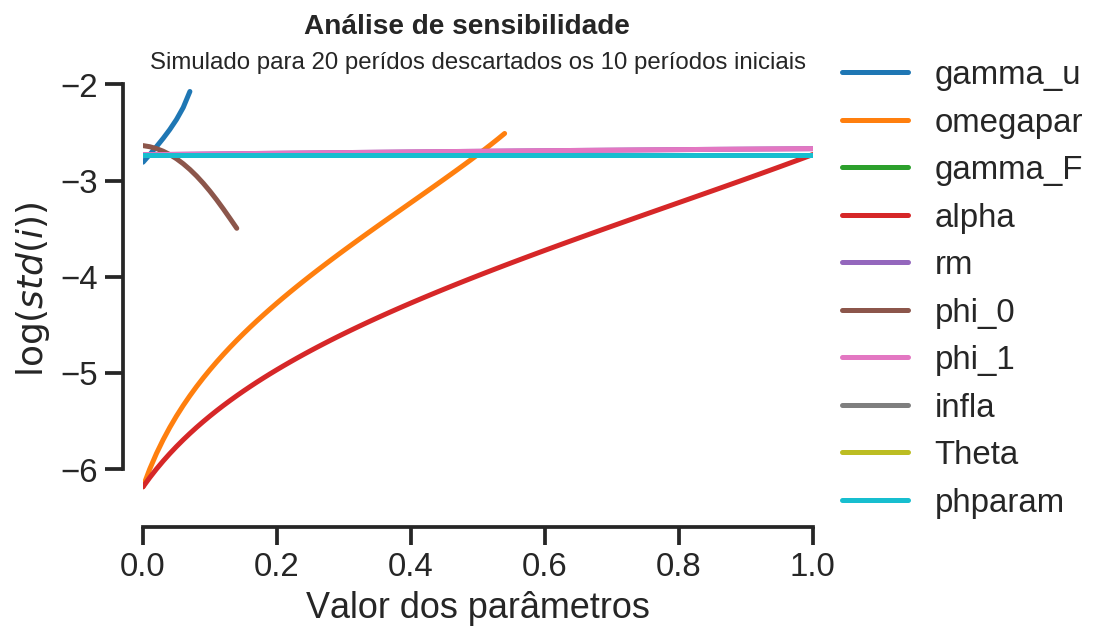

Total running time:  0:06:04.301050


,gamma_u,omegapar,gamma_F,alpha,rm,phi_0,phi_1,infla,Theta,phparam
0.00,-2.808011,-6.181597,-2.729016,-6.181568,-2.730597,-2.635692,-2.730597,-2.729016,-2.729016,-2.729016
0.01,-2.729016,-5.996957,-2.729016,-6.085831,-2.729805,-2.647213,-2.729805,-2.729016,-2.729016,-2.729016
0.02,-2.647192,-5.836049,-2.729016,-5.996962,-2.729016,-2.666501,-2.729016,-2.729016,-2.729016,-2.729016
0.03,-2.561076,-5.692943,-2.729016,-5.913965,-2.728231,-2.693728,-2.728231,-2.729016,-2.729016,-2.729016
0.04,-2.468238,-5.563713,-2.729016,-5.836045,-2.727449,-2.729016,-2.727449,-2.729016,-2.729016,-2.729016
0.05,-2.364302,-5.445558,-2.729016,-5.762551,-2.726670,-2.772448,-2.726670,-2.729016,-2.729016,-2.729016
0.06,-2.240330,-5.336435,-2.729016,-5.692950,-2.725894,-2.824057,-2.725894,-2.729016,-2.729016,-2.729016
0.07,-2.073266,-5.234817,-2.729016,-5.626804,-2.725121,-2.883809,-2.725121,-2.729016,-2.729016,-2.729016
0.08,inf,-5.139522,-2.729016,-5.563712,-2.724352,-2.951580,-2.724352,-2.729016,-2.729016,-2.729016
0.09,inf,-5.049607,-2.729016,-5.503393,-2.723586,-3.027119,-2.723586,-2.729016,-2.729016,-2.729016


In [62]:
sobol()

# Finishing

In [63]:
print("Total running time: ", datetime.now() - t1)
print("Simulation running time: ", t2 - t1)
print("Sobol running time: ", datetime.now() - t2)

Total running time:  0:07:30.826931
Simulation running time:  0:01:26.477020
Sobol running time:  0:06:04.350191
